<a href="https://colab.research.google.com/github/Chinmaya54/CP_02_T16_MineCrafters/blob/swayista/DM_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import csv

In [24]:
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.filterwarnings(action = "ignore")


In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [28]:
df.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [15]:
df.shape

(1109383, 28)

In [16]:
df.dtypes


authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

In [9]:
df.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      747261
for-ages              1033390
format                   6622
id                          0
illustrations-note     752907
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(28)

,missing_percentage
index-date,100.000000
publication-place,100.000000
for-ages,93.149976
edition,83.521110
imprint,74.820779
illustrations-note,67.867184
edition-statement,67.358252
bestsellers-rank,42.081229
rating-avg,39.673404
rating-count,39.673404


In [29]:
#df.drop(['A'], axis=1)#dropping irrelevant columns and above 85%missing columns
df1 = df.drop(['for-ages', 'edition', 'illustrations-note', 'edition-statement', 'format', 'image-path', 'image-url', 'image-checksum', 'url', 'id', 'description', 'publication-place', 'index-date'], axis=1)

In [30]:
df1.head()

,authors,bestsellers-rank,categories,dimension-x,dimension-y,dimension-z,imprint,isbn10,isbn13,lang,publication-date,rating-avg,rating-count,title,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",129.0,198.0,20.0,Mainstream Publishing,184018907X,9781840189070,en,2004-10-14 00:00:00,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,224.00
1,"[2, 3]",115215.0,"[235, 3386]",127.0,203.2,25.4,NaN,184454737X,9781844547371,en,2009-03-13 00:00:00,3.60,335.0,Underbelly : The Gangland War,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",150.0,224.0,28.0,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,3.88,37211.0,"A Sir Phillip, Con Amor",386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",153.0,234.0,24.0,NaN,571308996,9780571308996,en,2015-10-01 00:00:00,4.17,384.0,QI: The Third Book of General Ignorance,436.00
4,[9],98413.0,"[2813, 2980]",191.0,240.0,29.0,HarperCollins Publishers Ltd,8352518,9780008352516,en,2019-06-18 00:00:00,3.90,5095.0,The Hidden Power of F*cking Up,980.00


In [31]:
# Convert "publication-date" to a datetime format
df1['publication-date'] = pd.to_datetime(df1['publication-date'])

# Extract year, month, and day components into separate columns and add them to the DataFrame
df1['publication-year'] = df1['publication-date'].dt.year
df1['publication-month'] = df1['publication-date'].dt.month
df1['publication-day'] = df1['publication-date'].dt.day

# Now, your DataFrame will have the new columns: publication-year, publication-month, and publication-day
print(df1)

                 authors  bestsellers-rank  \
0                    [1]           49848.0   
1                 [2, 3]          115215.0   
2                    [4]           11732.0   
3           [5, 6, 7, 8]          114379.0   
4                    [9]           98413.0   
...                  ...               ...   
1109378         [120629]               NaN   
1109379         [336369]               NaN   
1109380  [29792, 654019]               NaN   
1109381         [654020]               NaN   
1109382         [654021]               NaN   

                                            categories  dimension-x  \
0        [214, 220, 237, 2646, 2647, 2659, 2660, 2679]       129.00   
1                                          [235, 3386]       127.00   
2                               [358, 2630, 360, 2632]       150.00   
3                                    [377, 2978, 2980]       153.00   
4                                         [2813, 2980]       191.00   
...                  

In [13]:
df1['lang'].unique()

array(['en', 'es', nan, 'it', 'de', 'pl', 'pt', 'fr', 'hi', 'ja', 'mul',
       'ca', 'nl', 'lv', 'ru', 'ml', 'af', 'da', 'ms', 'ar', 'el', 'la',
       'sv', 'yo', 'id', 'tl', 'fa', 'zxx', 'cy', 'cr', 'zh', 'ro', 'lo',
       'tr', 'ig', 'cs', 'tw', 'iba', 'fi', 'crp', 'no', 'vi', 'mr', 'he',
       'sr', 'hu', 'sa', 'eo', 'hy', 'bn', 'nds', 'my', 'ur', 'sd', 'st',
       'jv', 'uk', 'sw', 'be', 'th', 'sn', 'ko', 'gsw', 'ka', 'is', 'gu',
       'eu', 'bg', 'so', 'ti', 'sq', 'ps', 'nb', 'rn', 'pa', 'tn', 'gl',
       'et', 'ku', 'tg', 'km', 'ga', 'om', 'ff', 'sl', 'tk', 'mg', 'te',
       'kn', 'ts', 'tt', 'bo', 'lb', 'or', 'hr', 'ta', 'ha', 'lt', 'mdr',
       'sk', 'mk', 'am', 'sco', 'ne', 'gd', 'nso', 'xh', 'ab', 'dak',
       'aus', 'yi', 'man', 'mi', 'rom', 'bs', 'zu', 'fiu', 'ce', 'kw',
       'haw', 'pi', 'frs', 'frr', 'ira', 'din', 'afh', 'apa', 'sm', 'ypk',
       'mis', 'sem', 'akk', 'si', 'ks', 'pra', 'syr', 'ae', 'arc', 'lad',
       'egy', 'pal', 'ug', 'mt', 'mn', 'az', 'c

In [18]:
df1['lang'].nunique()

162

In [23]:
# Create a DataFrame from the frequency table
pd.set_option('display.max_rows', None)
lang_frequency_df = pd.DataFrame(df1['lang'].value_counts()).reset_index()
lang_frequency_df.columns = ['Language', 'Count']

# Display the DataFrame
print(lang_frequency_df)


    Language   Count
0         en  986575
1         es   25366
2         de   16180
3         fr    7495
4         pl    2924
5         it    2276
6         pt    1306
7         ru     814
8         nl     700
9         hi     383
10        zh     350
11        ca     322
12        af     299
13        la     275
14        ar     274
15        cy     261
16        el     171
17        ga     157
18        sv     148
19        ja     137
20       mul     121
21        fi     112
22        da     111
23        cs      96
24        fa      96
25        he      92
26        sa      71
27        no      68
28        bn      67
29        eu      65
30        ta      59
31        tr      58
32       zxx      54
33        vi      52
34        hu      51
35        ro      50
36        ko      49
37        sr      46
38        gl      45
39        ur      45
40        si      44
41        ml      40
42        ts      35
43        ku      32
44        tn      29
45       nds      29
46        id 

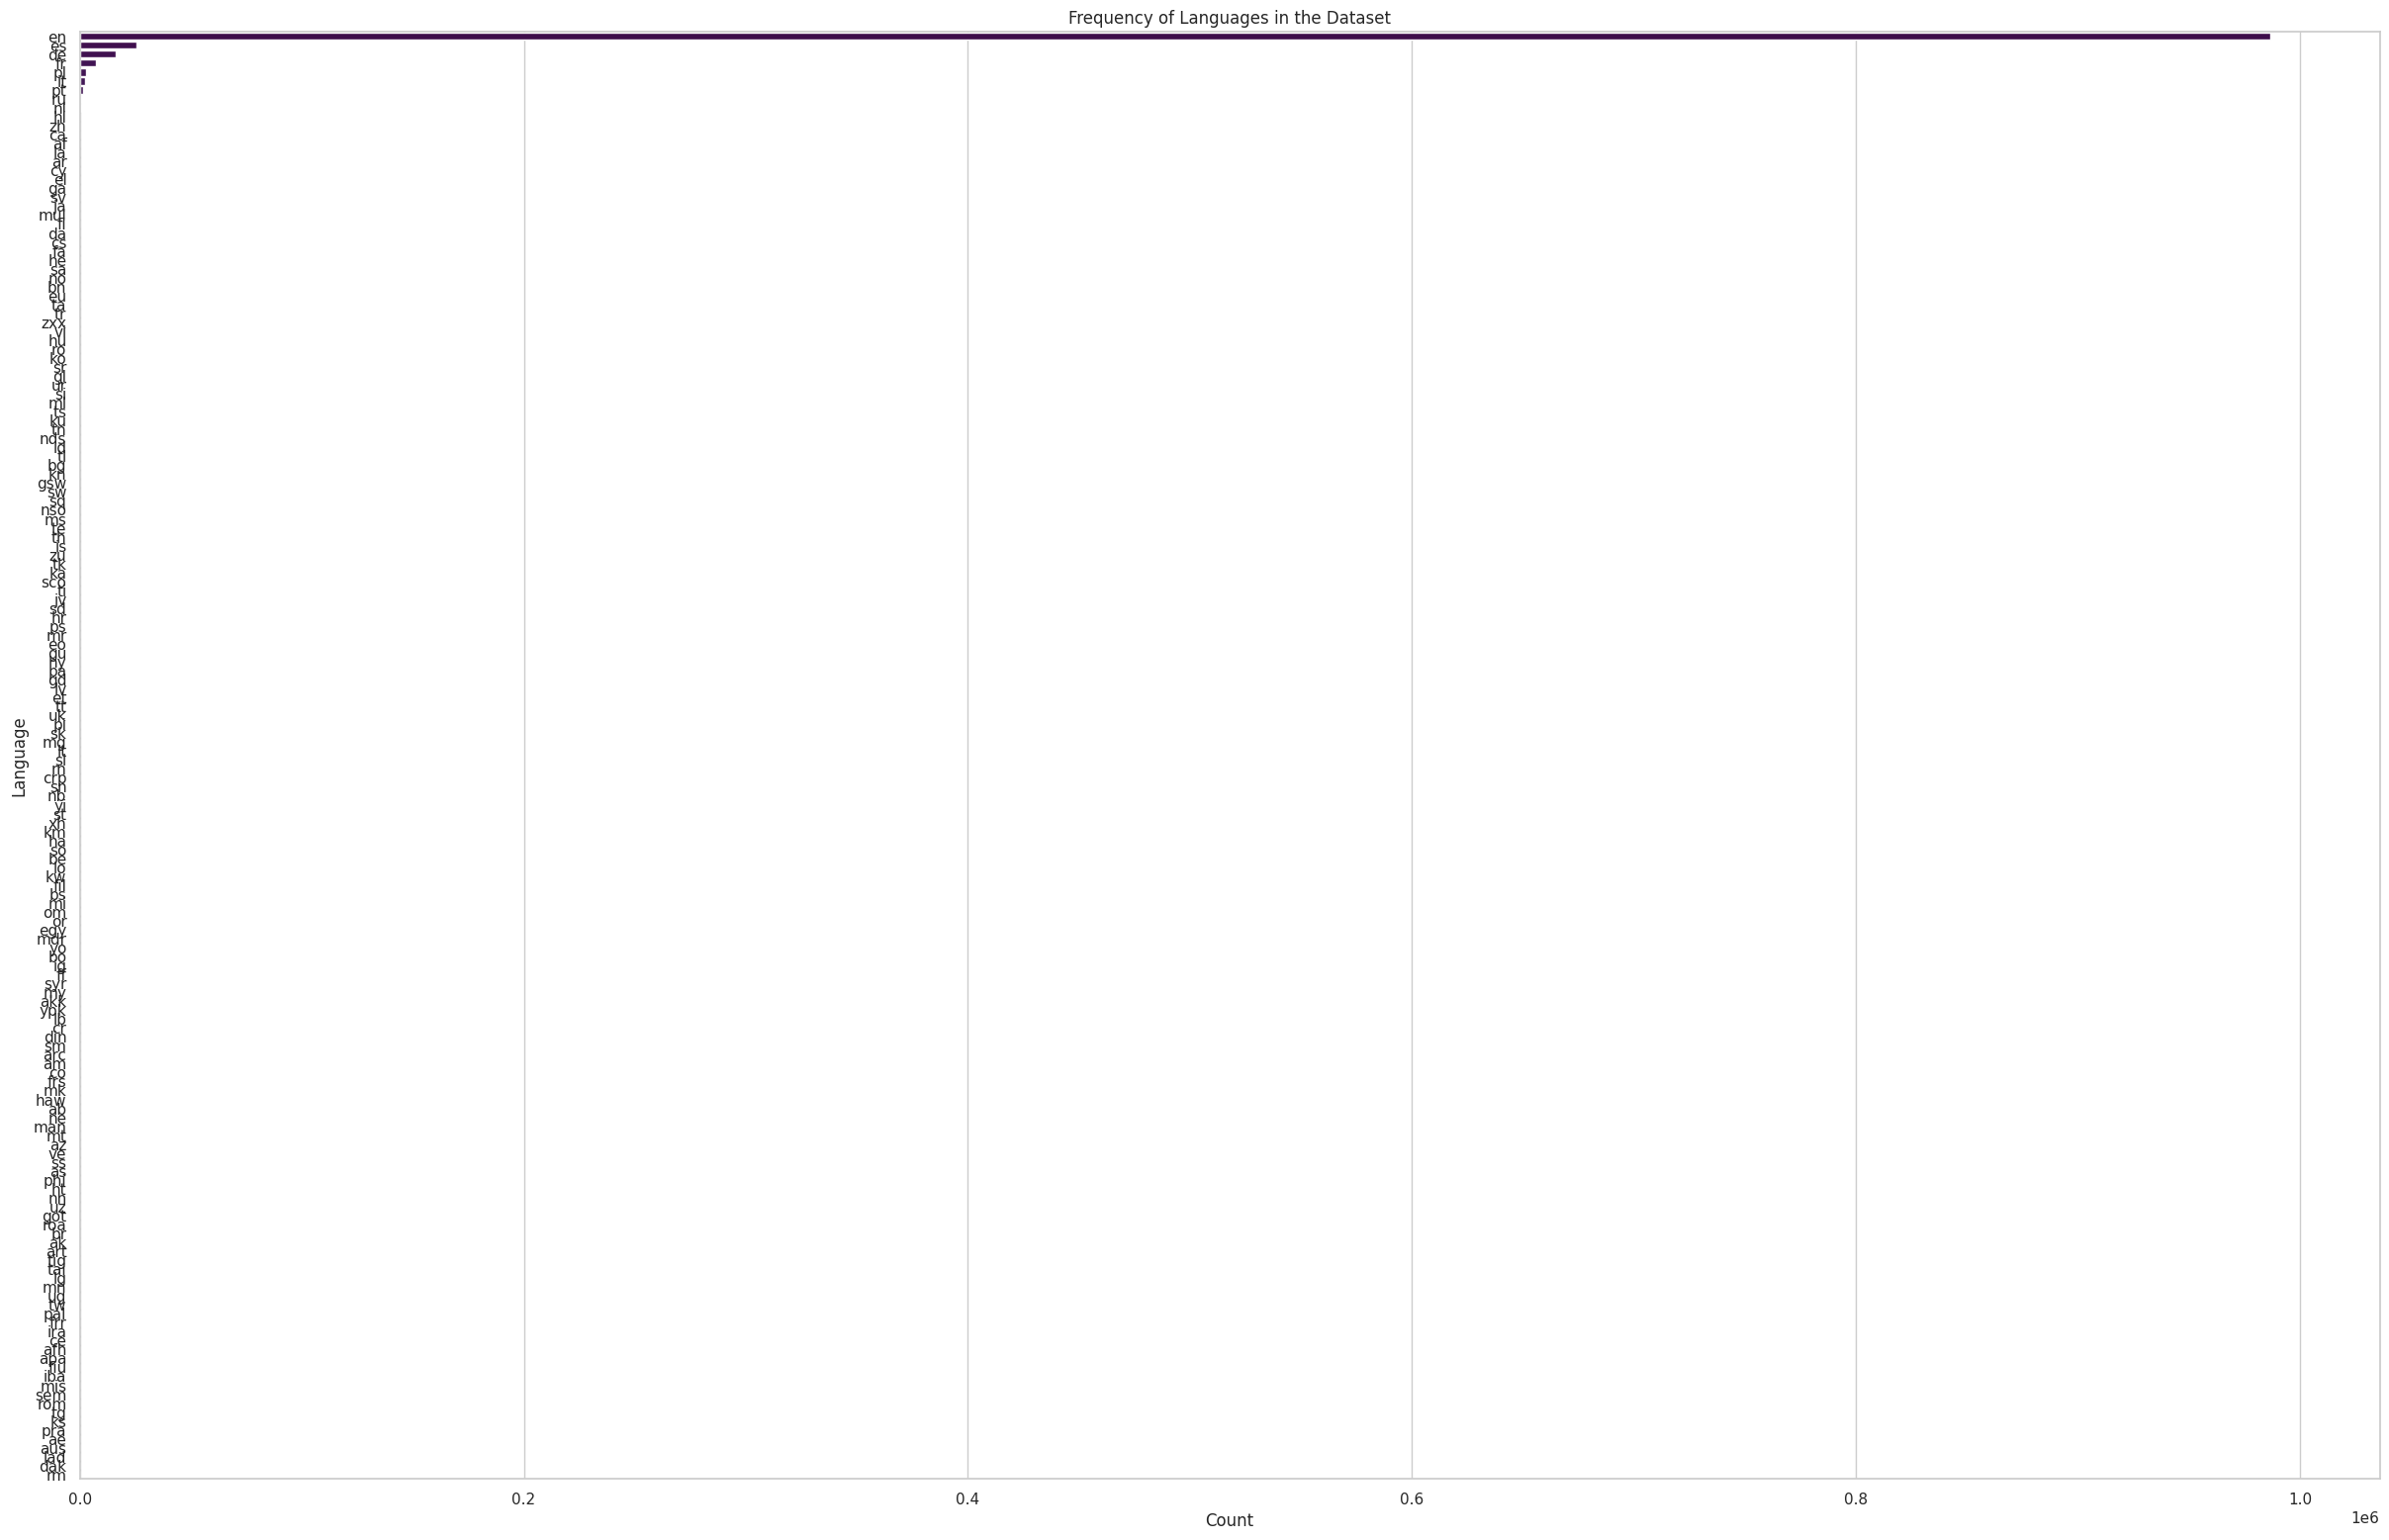

In [24]:
plt.figure(figsize=(30, 19))
sns.countplot(data=df1, y='lang', order=df1['lang'].value_counts().index, palette='viridis')
plt.title('Frequency of Languages in the Dataset')
plt.xlabel('Count')
plt.ylabel('Language')

# Show the plot
plt.show()

ValueError: ignored

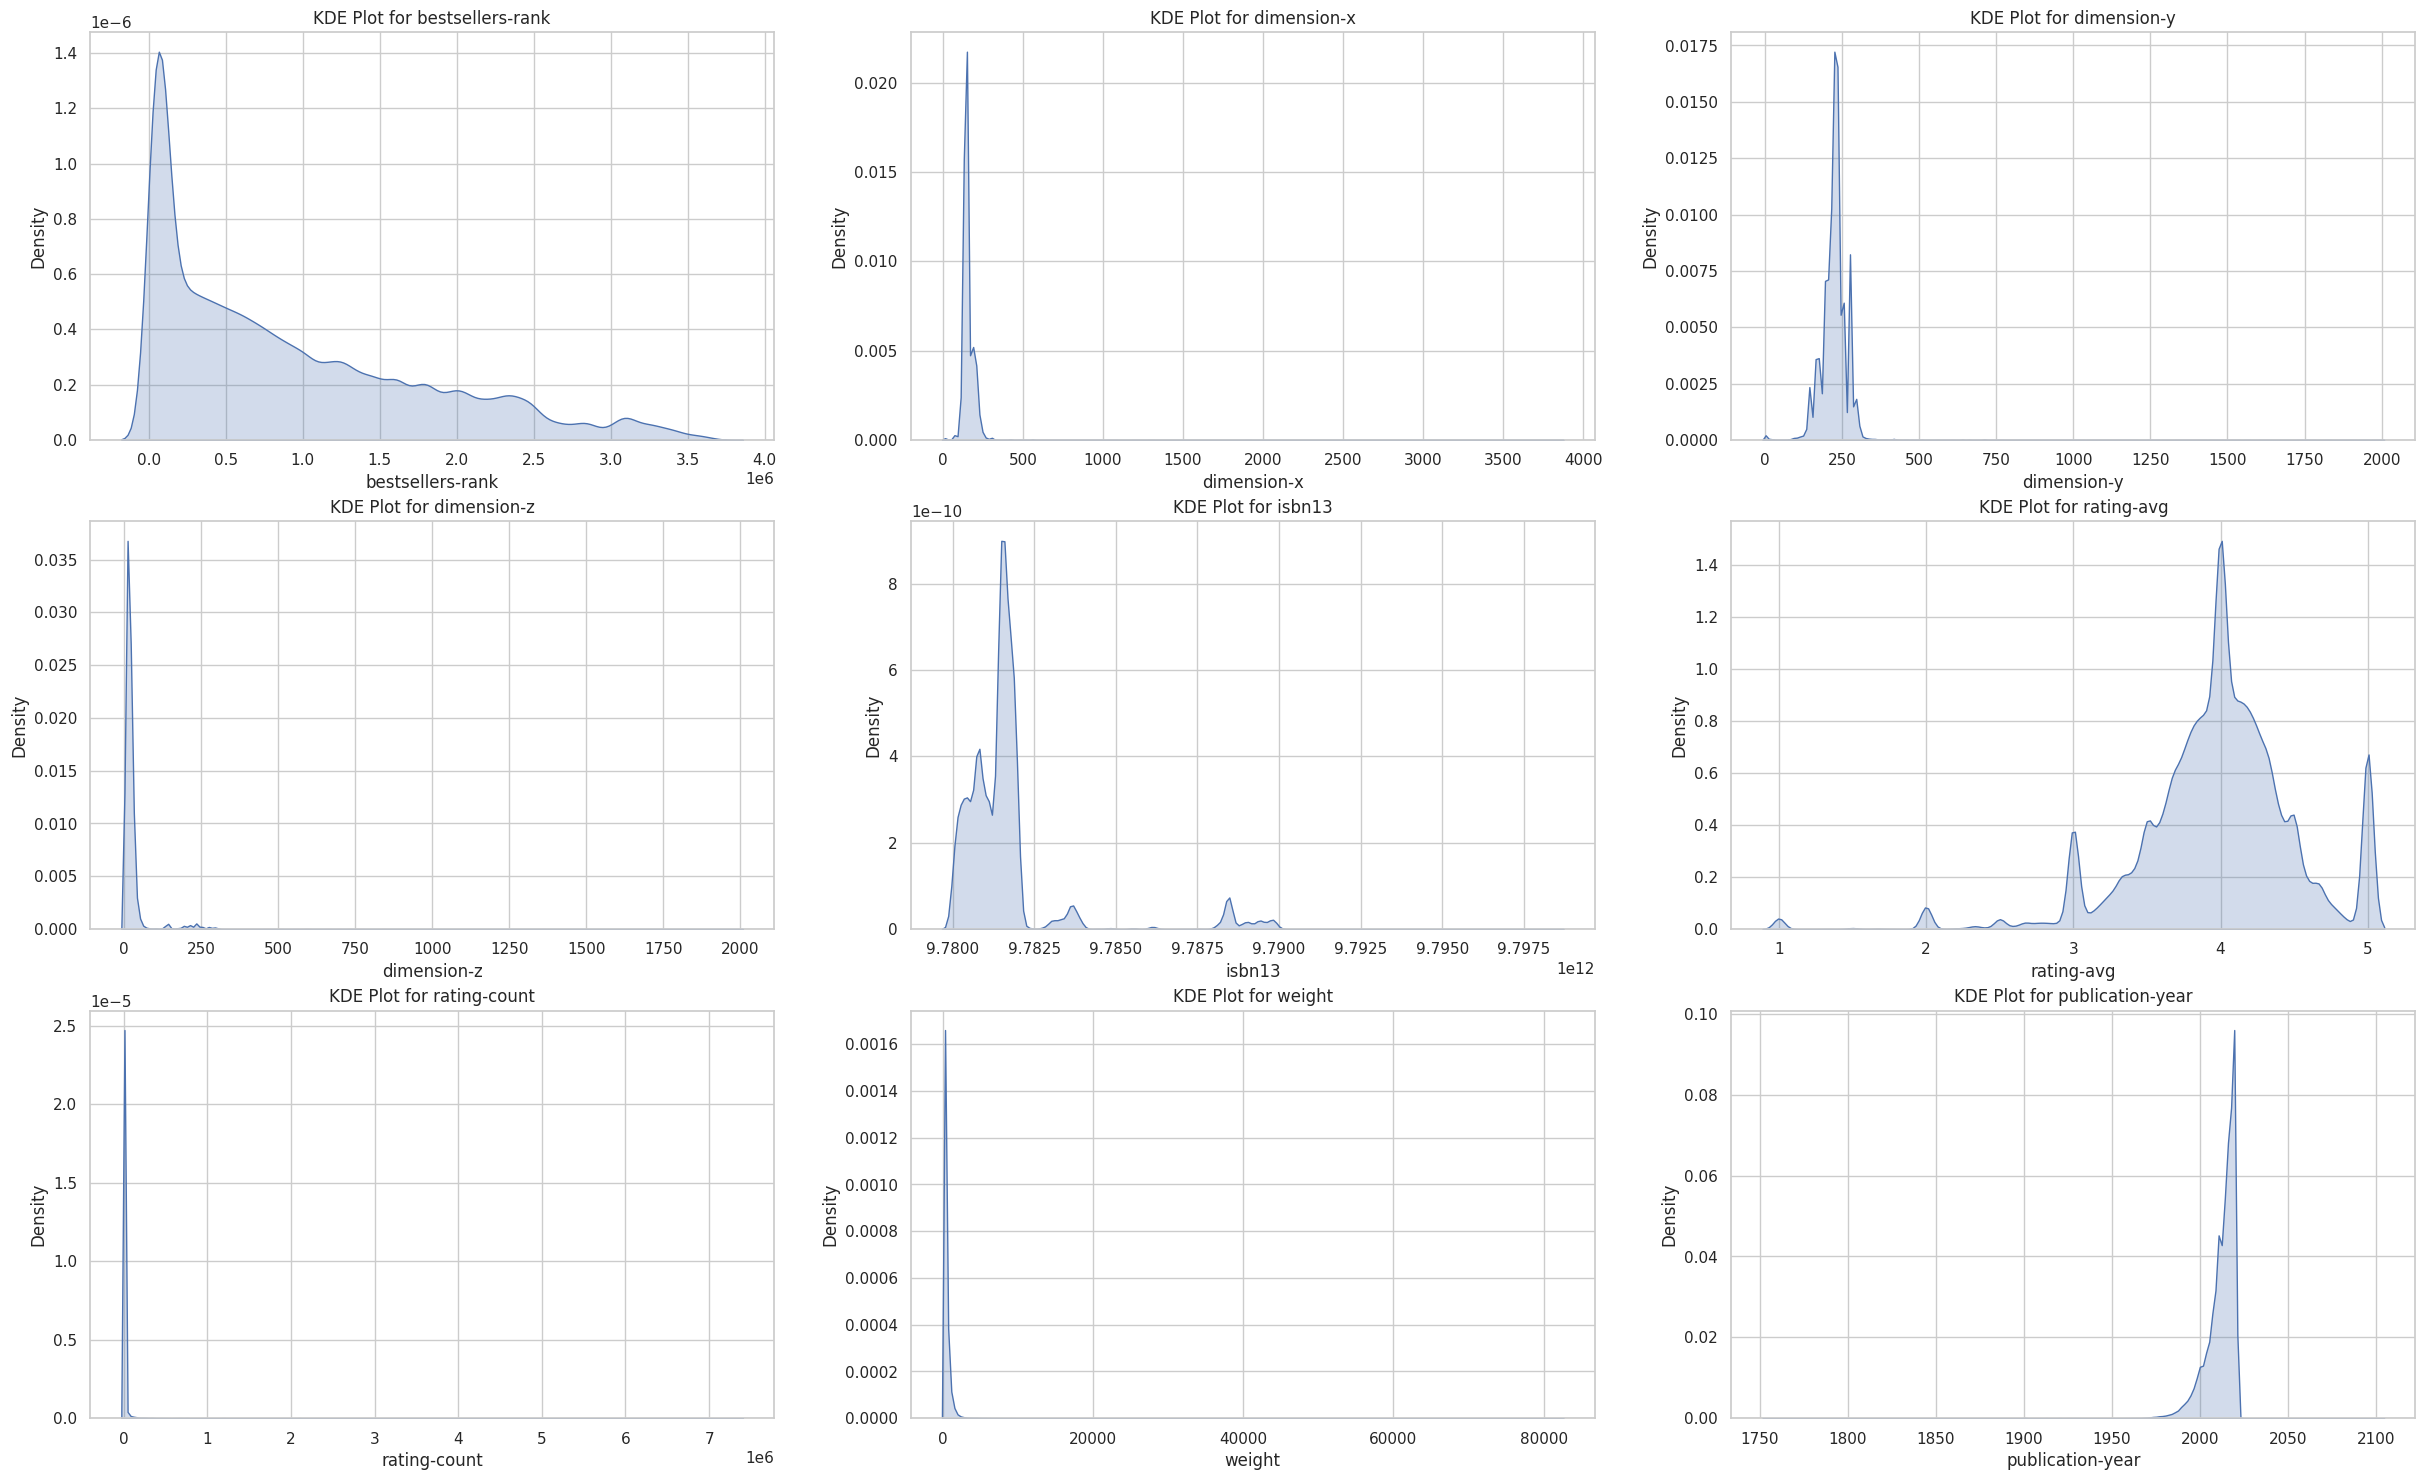

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Set the style of the plots (you can customize this)
sns.set(style="whitegrid")

# Create subplots for each numerical column
plt.figure(figsize=(30, 18))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data=df1, x=column, fill=True)
    plt.title(f'KDE Plot for {column}')
    plt.xlabel(column)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


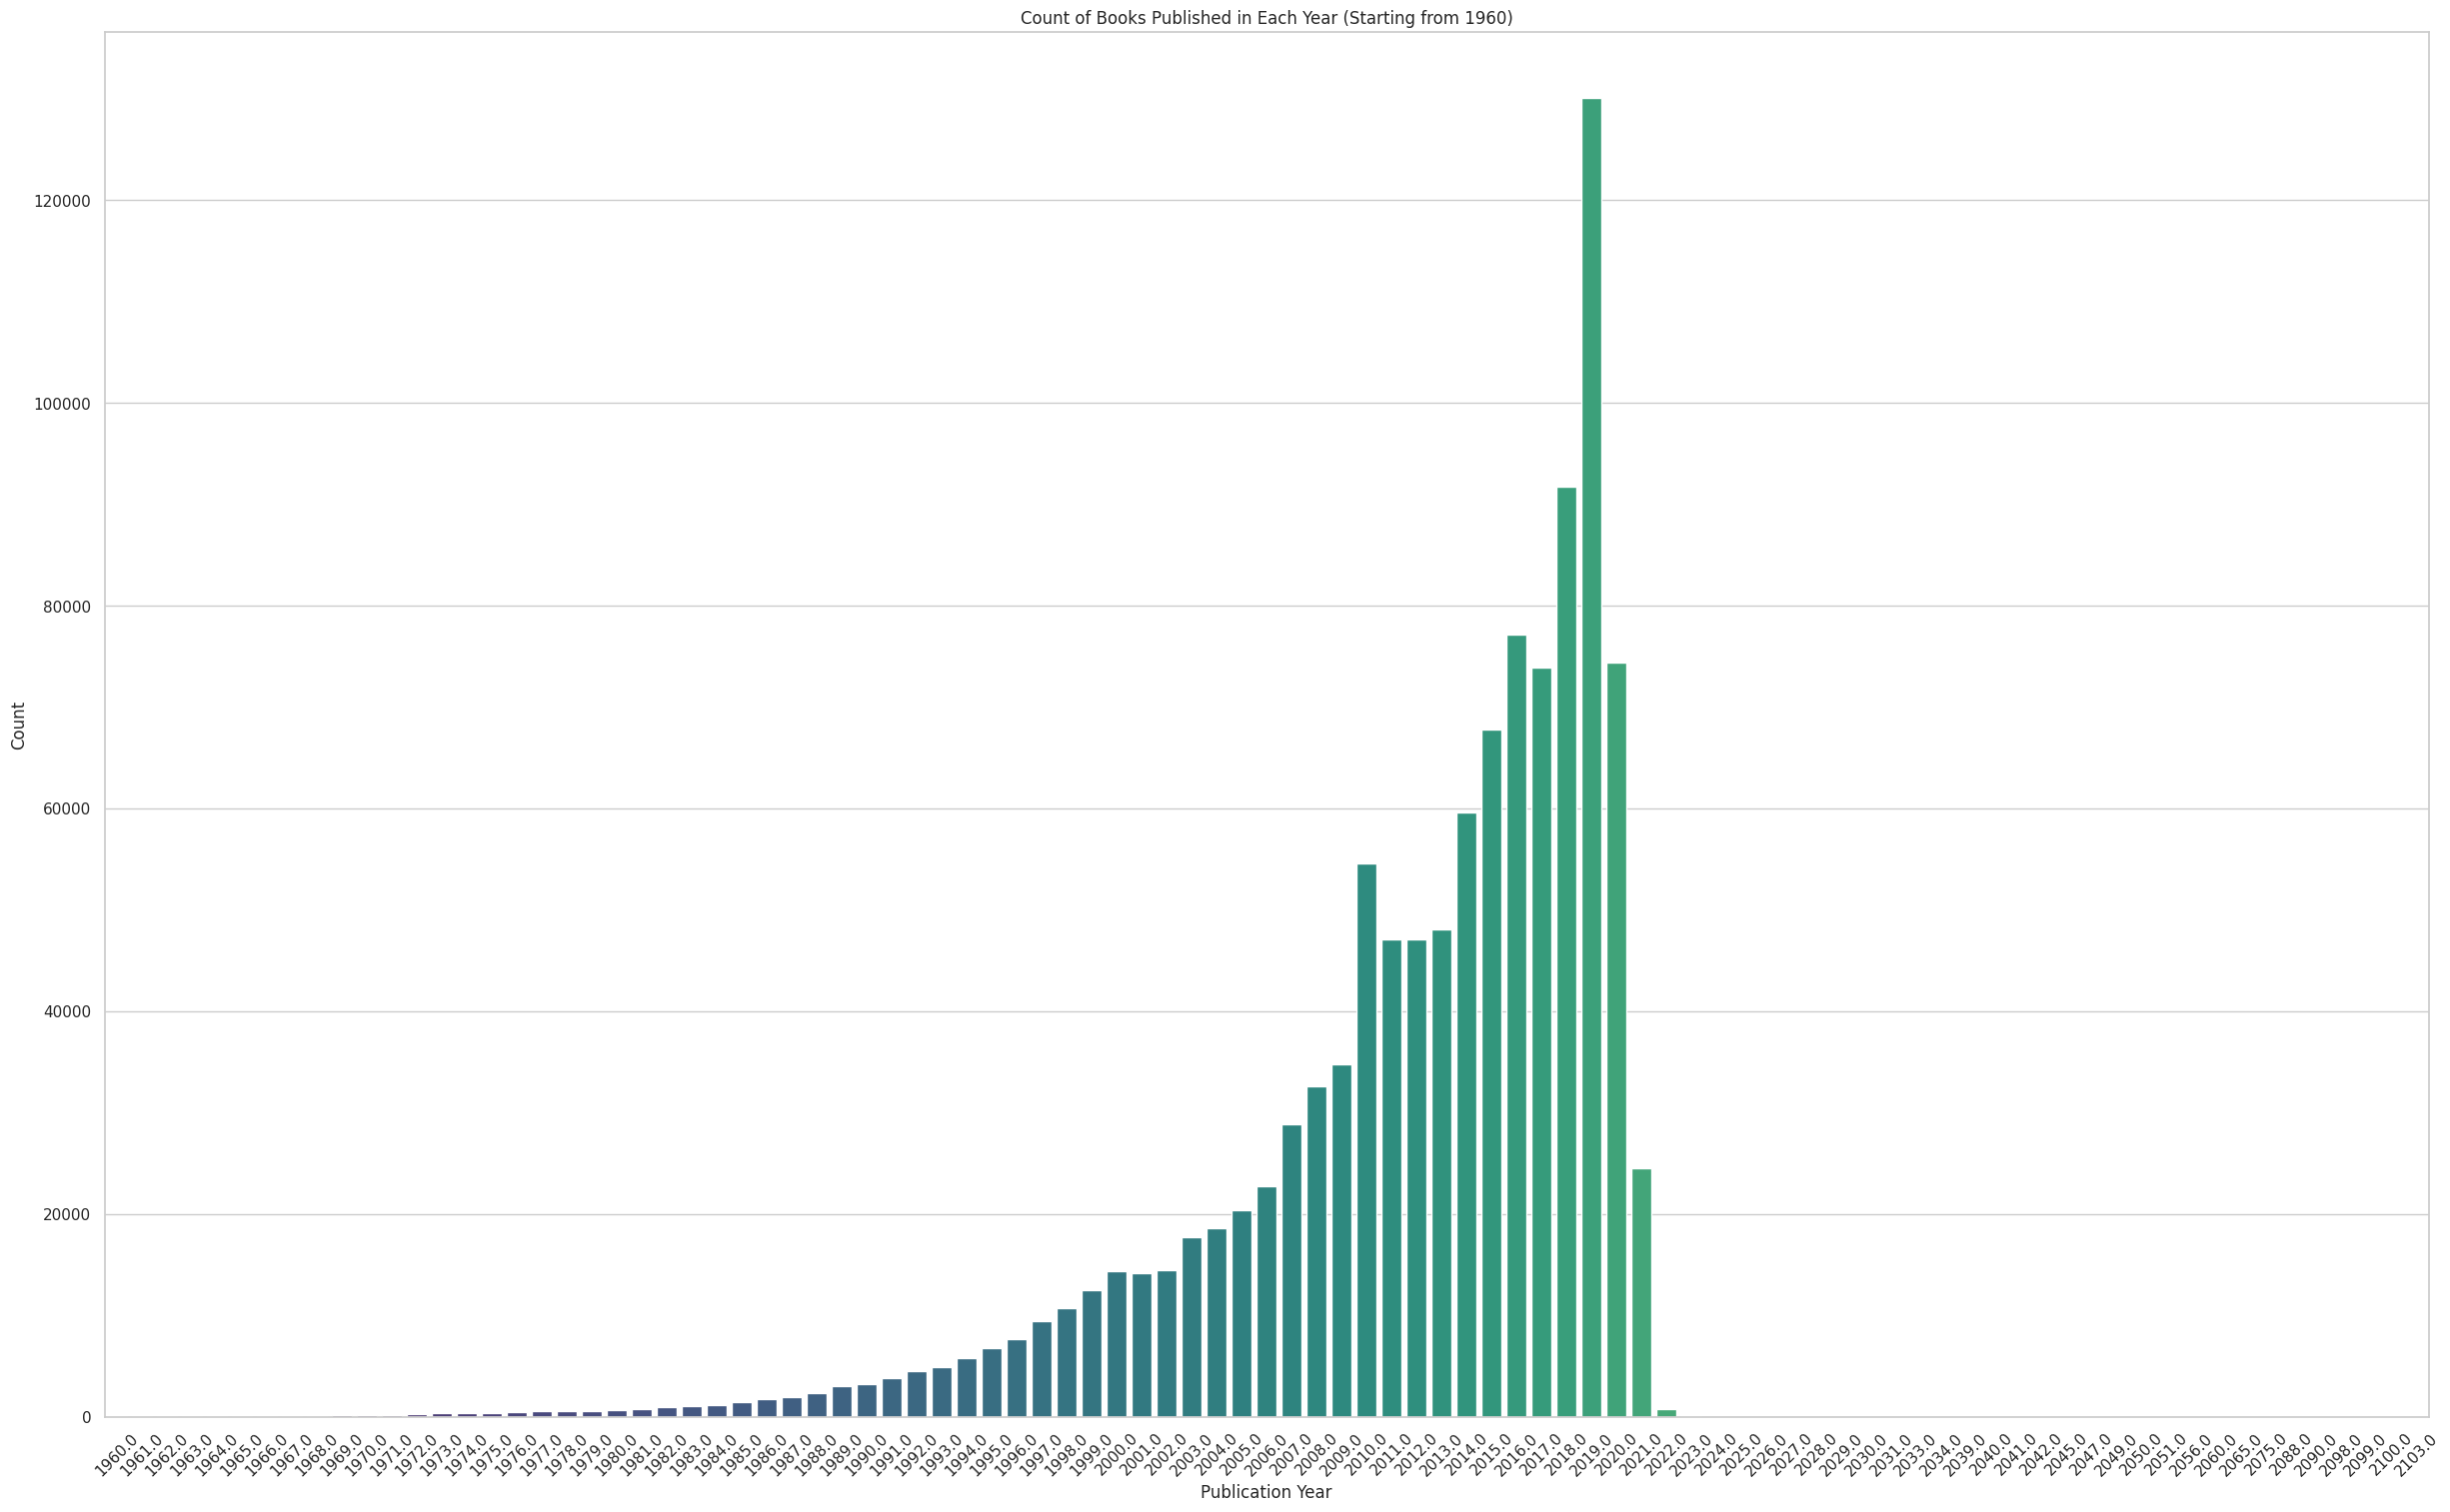

In [24]:
import matplotlib.pyplot as plt      #count of years
import seaborn as sns

# Set the style of the plot (you can customize this)
sns.set(style="whitegrid")

# Filter the data to include years starting from 1960
filtered_data = df1[df1['publication-year'] >= 1960]

# Count the number of books published in each year
year_counts = filtered_data['publication-year'].value_counts().reset_index()
year_counts.columns = ['Publication Year', 'Count']

# Sort the years in ascending order
year_counts = year_counts.sort_values(by='Publication Year')

# Create a bar plot for the count of books published in each year
plt.figure(figsize=(30, 18))
sns.barplot(data=year_counts, x='Publication Year', y='Count', palette='viridis')

plt.title('Count of Books Published in Each Year (Starting from 1960)')
plt.xlabel('Publication Year')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


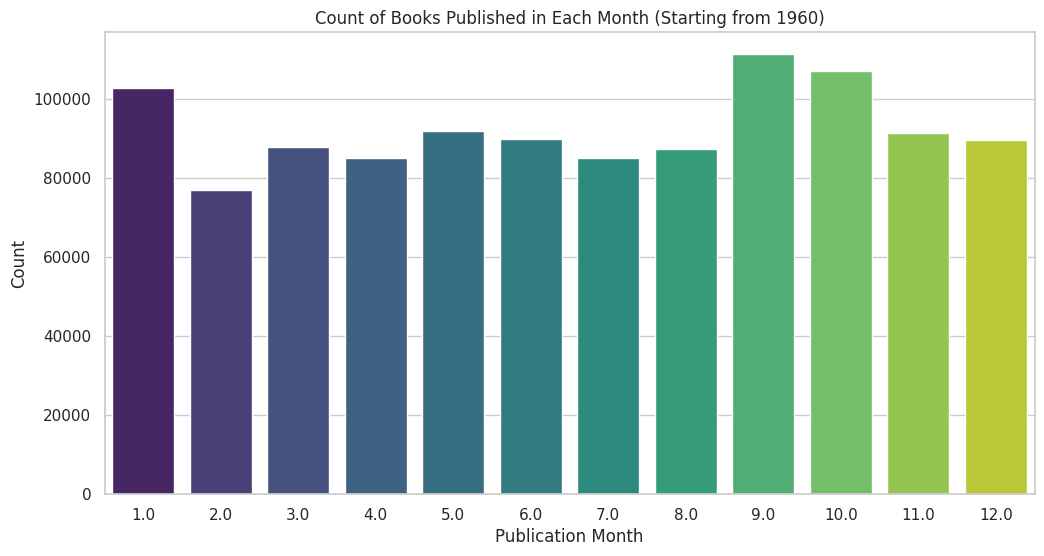

In [25]:
# Count the number of books published in each month within the filtered years
month_counts = df1['publication-month'].value_counts().reset_index()
month_counts.columns = ['Publication Month', 'Count']

# Sort the months in ascending order
month_counts = month_counts.sort_values(by='Publication Month')

# Create a bar plot for the count of books published in each month
plt.figure(figsize=(12, 6))
sns.barplot(data=month_counts, x='Publication Month', y='Count', palette='viridis')

plt.title('Count of Books Published in Each Month (Starting from 1960)')
plt.xlabel('Publication Month')
plt.ylabel('Count')

# Show the plot
plt.show()



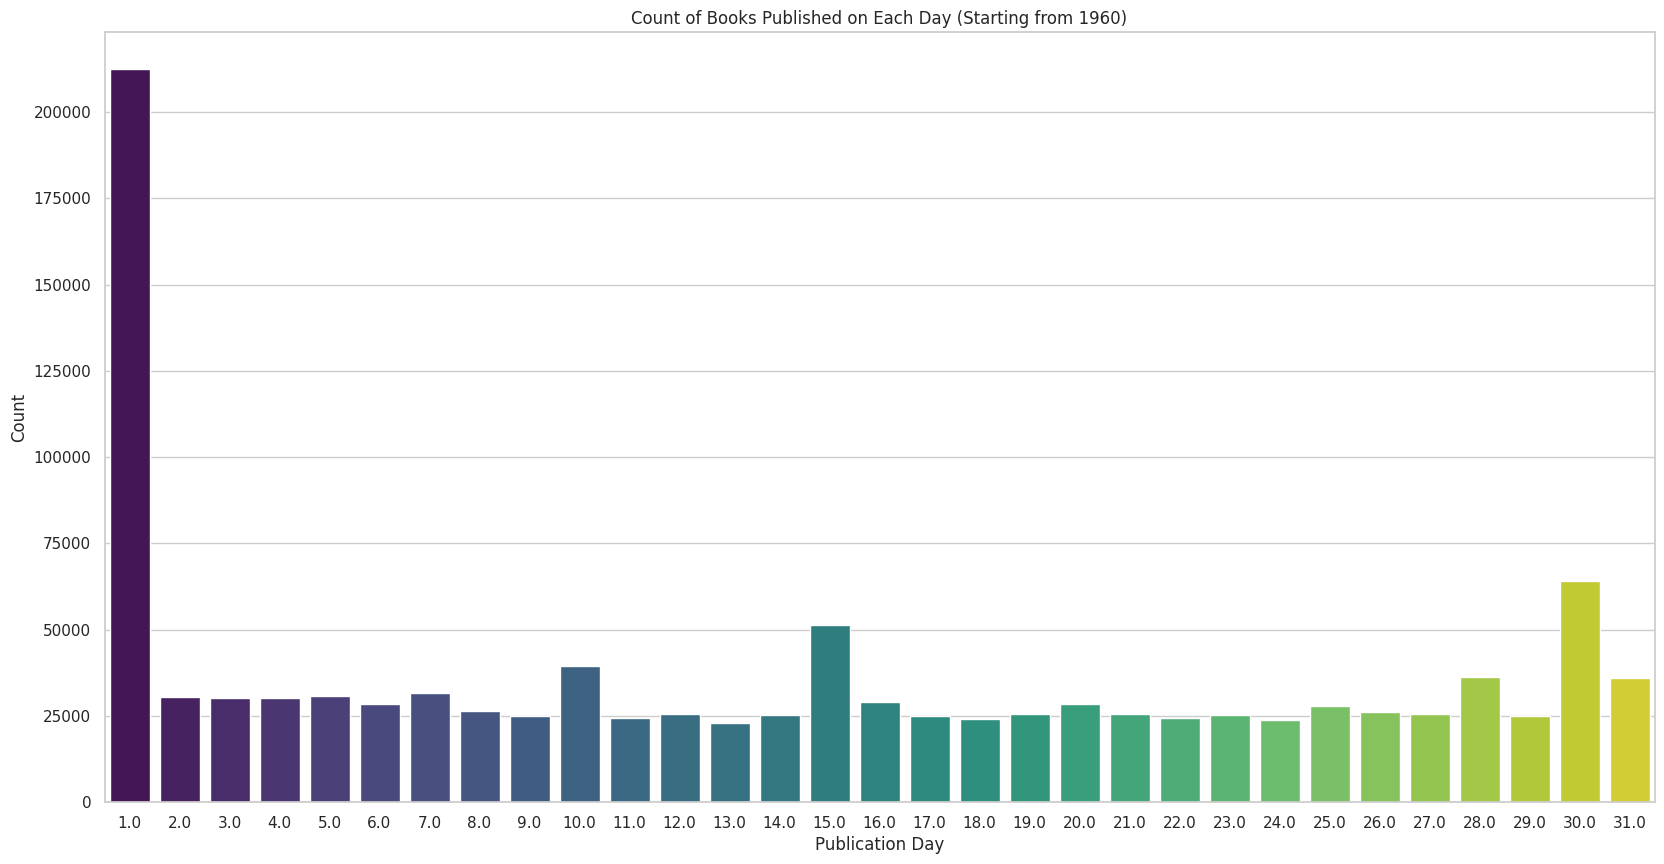

In [27]:
# Count the number of books published on each day within the filtered years
day_counts = df1['publication-day'].value_counts().reset_index()
day_counts.columns = ['Publication Day', 'Count']

# Sort the days in ascending order
day_counts = day_counts.sort_values(by='Publication Day')

# Create a bar plot for the count of books published on each day
plt.figure(figsize=(20, 10))
sns.barplot(data=day_counts, x='Publication Day', y='Count', palette='viridis')

plt.title('Count of Books Published on Each Day (Starting from 1960)')
plt.xlabel('Publication Day')
plt.ylabel('Count')

# Show the plot
plt.show()



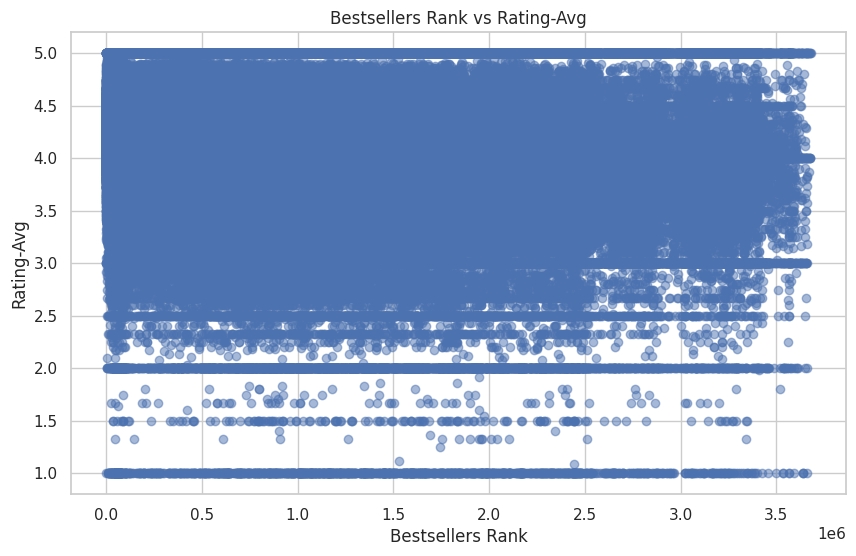

In [33]:
# Create a scatter plot of 'bestsellers-rank' vs 'rating-avg'. # should be inversely related
plt.figure(figsize=(10, 6))
plt.scatter(df1['bestsellers-rank'], df1['rating-avg'], alpha=0.5)
plt.title('Bestsellers Rank vs Rating-Avg')
plt.xlabel('Bestsellers Rank')
plt.ylabel('Rating-Avg')

# Show the plot
plt.show()

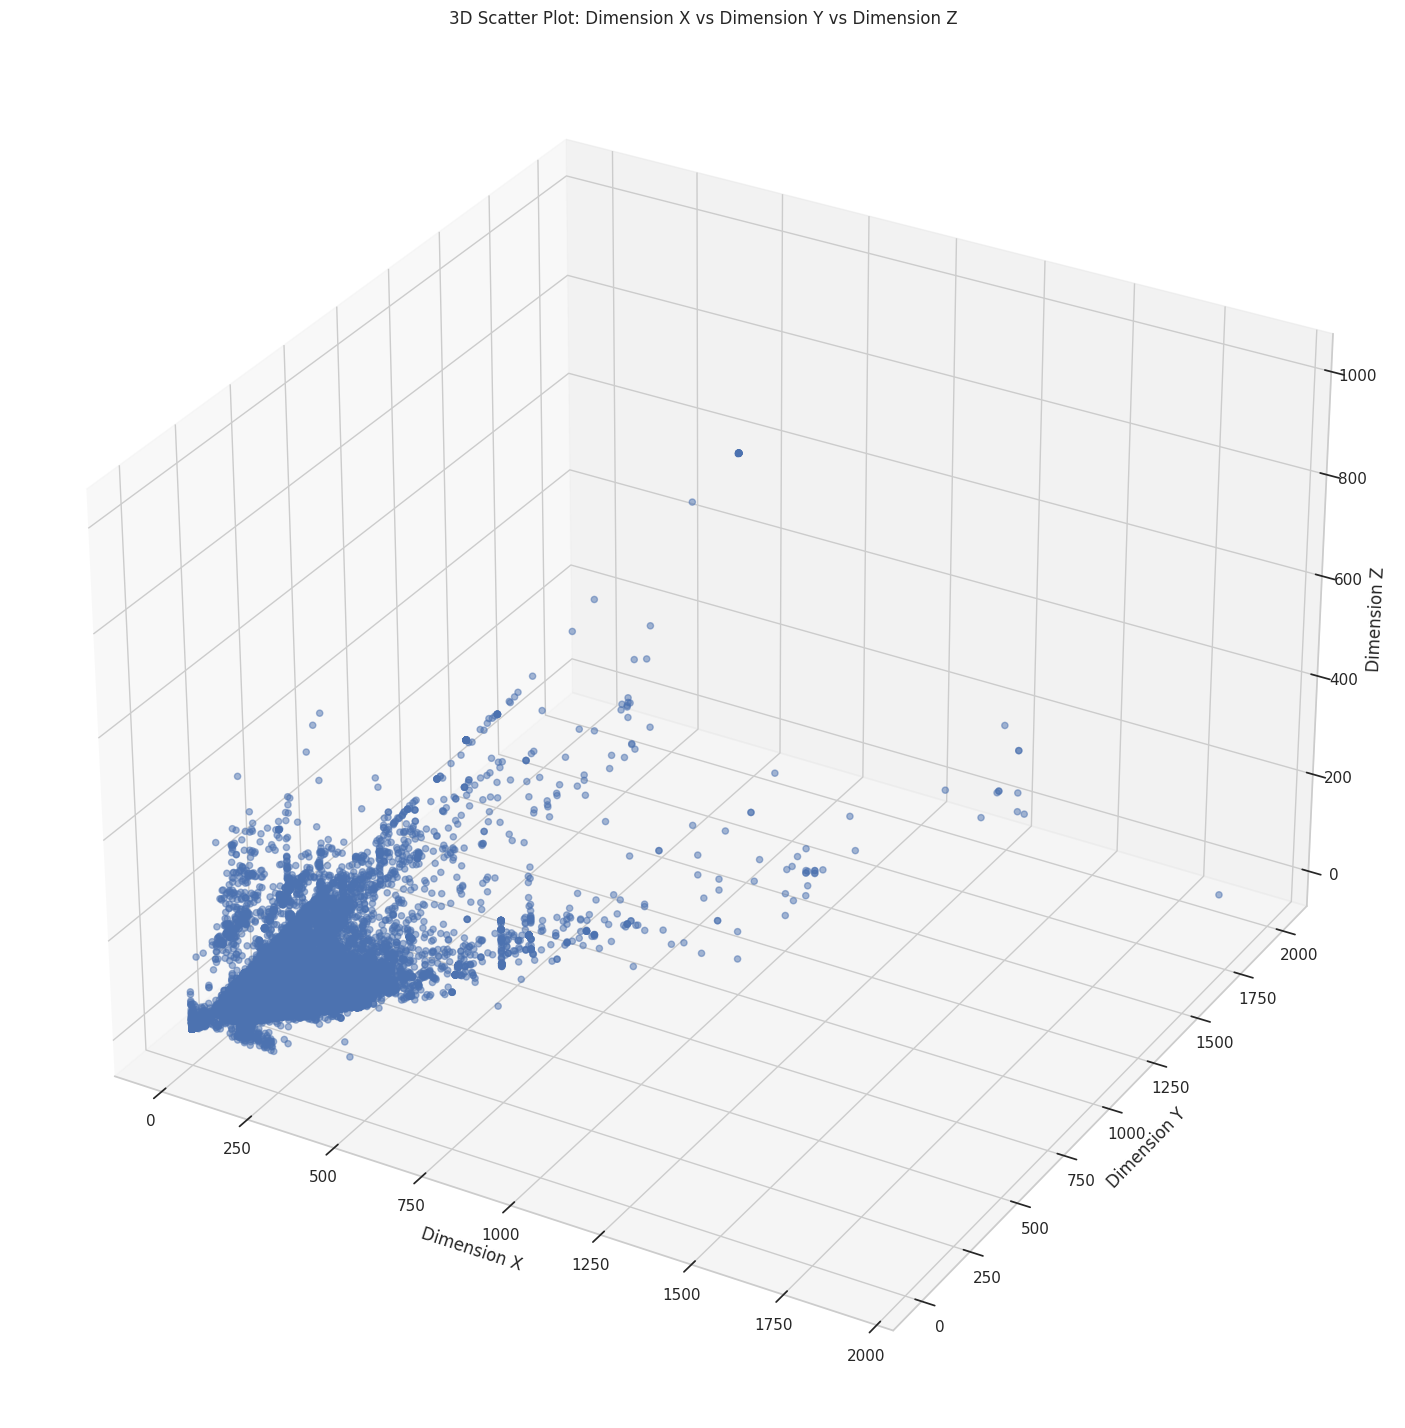

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for 'dimension-x', 'dimension-y', and 'dimension-z'
fig = plt.figure(figsize=(30, 18))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df1['dimension-x'], df1['dimension-y'], df1['dimension-z'], c='b', marker='o', alpha=0.5)

ax.set_xlabel('Dimension X')
ax.set_ylabel('Dimension Y')
ax.set_zlabel('Dimension Z')

ax.set_title('3D Scatter Plot: Dimension X vs Dimension Y vs Dimension Z')

plt.show()


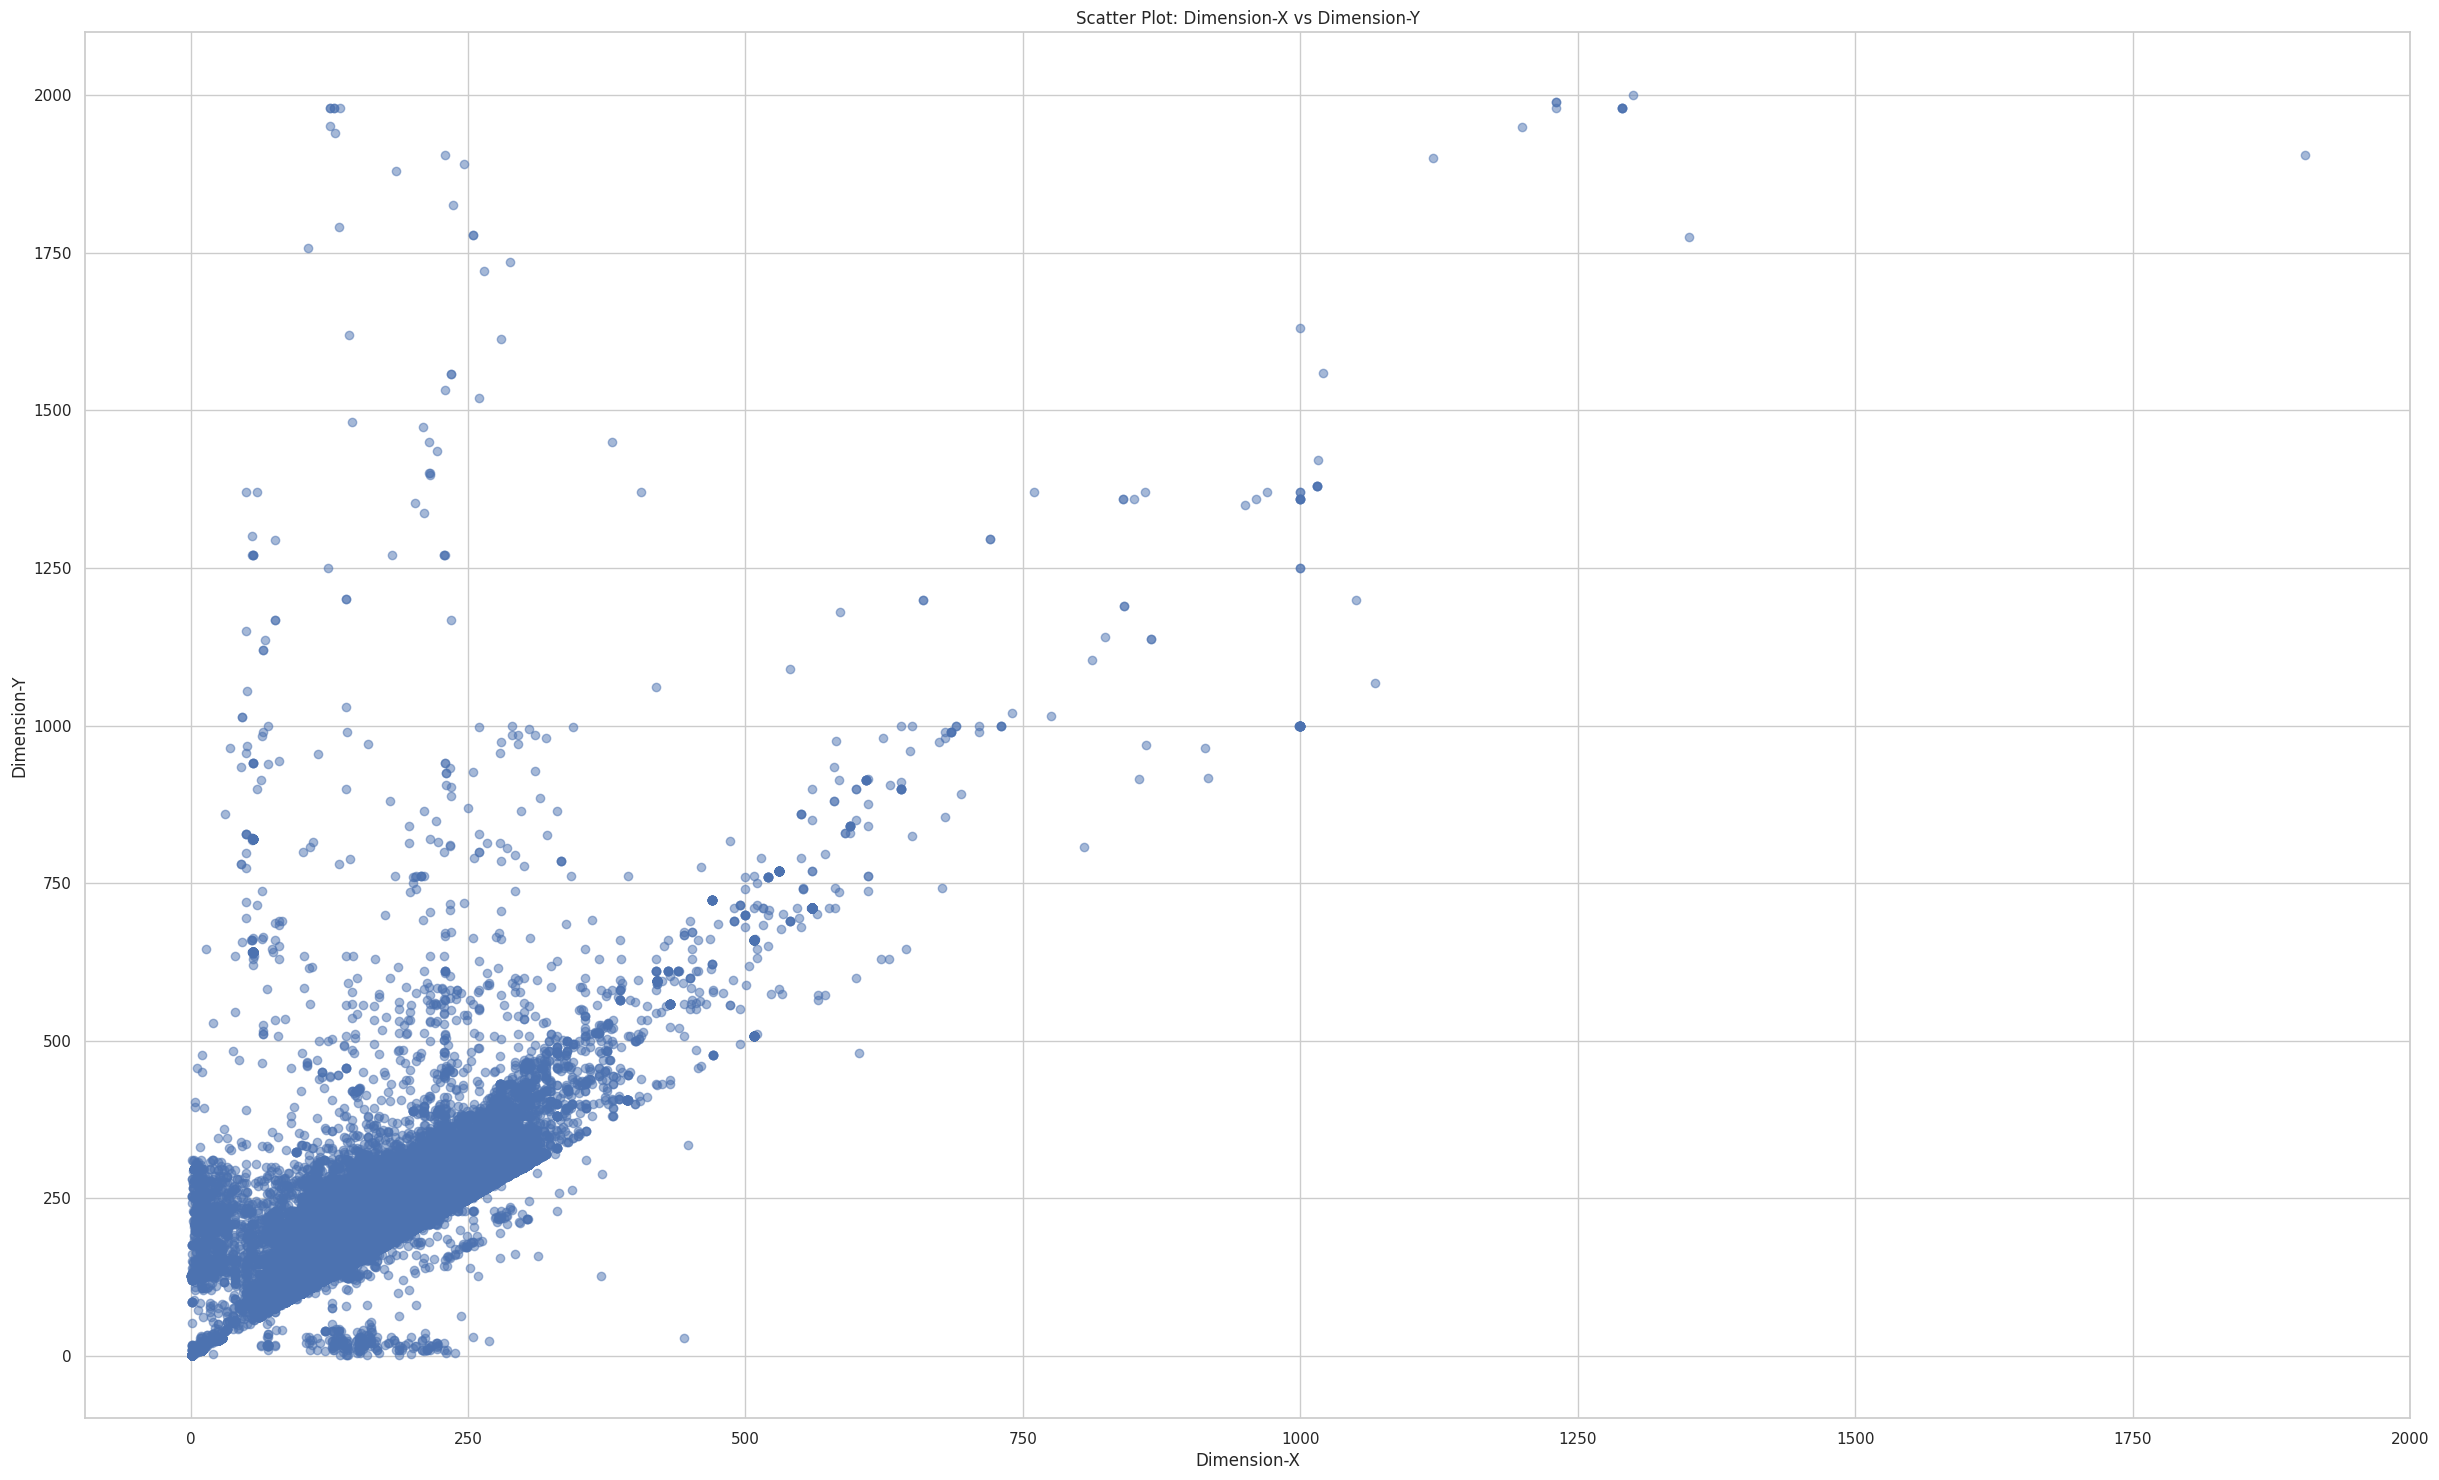

In [28]:
# Create a scatter plot for 'dimension-x' vs 'dimension-y'
plt.figure(figsize=(30, 18))
plt.scatter(df1['dimension-x'], df1['dimension-y'], alpha=0.5)
plt.title('Scatter Plot: Dimension-X vs Dimension-Y')
plt.xlabel('Dimension-X')
plt.ylabel('Dimension-Y')

# Show the plot
plt.show()

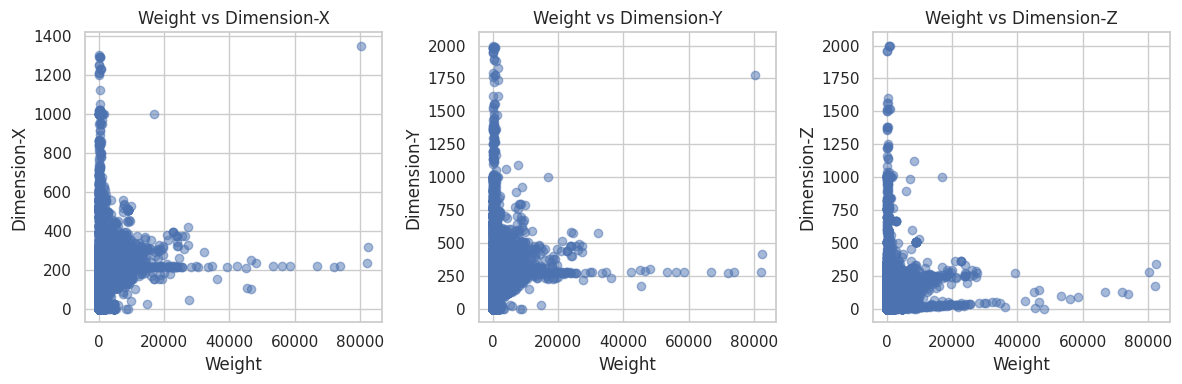

In [29]:
# Create a scatterplot for 'weight' vs 'dimension-x'
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(df1['weight'], df1['dimension-x'], alpha=0.5)
plt.title('Weight vs Dimension-X')
plt.xlabel('Weight')
plt.ylabel('Dimension-X')

# Create a scatterplot for 'weight' vs 'dimension-y'
plt.subplot(132)
plt.scatter(df1['weight'], df1['dimension-y'], alpha=0.5)
plt.title('Weight vs Dimension-Y')
plt.xlabel('Weight')
plt.ylabel('Dimension-Y')

# Create a scatterplot for 'weight' vs 'dimension-z'
plt.subplot(133)
plt.scatter(df1['weight'], df1['dimension-z'], alpha=0.5)
plt.title('Weight vs Dimension-Z')
plt.xlabel('Weight')
plt.ylabel('Dimension-Z')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
df1.nlargest(200, ['rating-avg'])

,authors,bestsellers-rank,categories,dimension-x,dimension-y,dimension-z,imprint,isbn10,isbn13,lang,publication-date,rating-avg,rating-count,title,weight,publication-year,publication-month,publication-day
18,"[24, 25, 26, 27, 28]",1303328.0,"[146, 3261, 334, 2978, 2980]",138.0,140.0,23.00,BBC Physical Audio,1785296140,9781785296147,en,2017-11-01,5.0,2.0,Steptoe & Son: Series 5 & 6 : 15 episodes of t...,200.00,2017.0,11.0,1.0
33,"[45, 46]",438805.0,"[2978, 2980, 2452]",63.0,76.0,50.80,"Running Press,U.S.",762442565,9780762442560,en,2011-09-06,5.0,2.0,South Park: Butters vs. Professor Chaos,114.00,2011.0,9.0,6.0
55,"[70, 71, 72, 73]",1240372.0,"[142, 3257, 146, 3261, 2978, 2980]",133.0,151.0,11.00,BBC Physical Audio,563504285,9780563504283,en,2006-05-01,5.0,2.0,Little Britain:Best Of TV Series 3,108.00,2006.0,5.0,1.0
80,"[72, 73, 108]",1559116.0,[2980],160.0,163.0,75.00,BBC Audiobooks Ltd,563504145,9780563504146,NaN,2005-11-07,5.0,1.0,"""Little Britain""... on Radio",732.00,2005.0,11.0,7.0
99,[129],NaN,"[144, 3259, 2978, 2980, 3063, 3112]",NaN,NaN,NaN,NaN,1527215563,9781527215566,NaN,2018-03-25,5.0,1.0,Cycling down The Street,NaN,2018.0,3.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,[4867],839551.0,"[2859, 2865, 2881]",105.0,148.0,5.00,NaN,190631635X,9781906316358,en,2009-09-03,5.0,4.0,Veg.,86.00,2009.0,9.0,3.0
4012,[4891],NaN,"[1532, 1626, 1689, 3008]",153.0,NaN,234.00,ALLEN LANE,241389356,9780241389355,en,2021-05-04,5.0,1.0,Finding the Mother Tree : Uncovering the Wisdo...,NaN,2021.0,5.0,4.0
4023,"[4907, 4908]",NaN,"[814, 3359, 820, 3365, 833, 3378, 836, 3381]",152.0,229.0,15.24,ROUTLEDGE,1138021725,9781138021723,en,2015-07-24,5.0,1.0,Best Practices for Flipping the College Classroom,386.00,2015.0,7.0,24.0
4028,"[4915, 4916]",3247632.0,"[241, 783, 3328, 832, 3377, 833, 3378]",152.0,229.0,11.18,NaN,1623969247,9781623969240,en,2015-01-30,5.0,1.0,Preparing Teachers to Work with English Langua...,299.37,2015.0,1.0,30.0


In [30]:
df1.nsmallest(200, ['bestsellers-rank'])

,authors,bestsellers-rank,categories,dimension-x,dimension-y,dimension-z,imprint,isbn10,isbn13,lang,publication-date,rating-avg,rating-count,title,weight,publication-year,publication-month,publication-day
96189,[74164],1001.0,"[214, 215, 233, 238, 654, 768, 2782]",152.00,234.00,22.00,Gill Books,717186350,9780717186358,en,2020-03-20,4.59,85.0,Bonus Time : A true story of surviving the wor...,384.00,2020.0,3.0,20.0
695733,[73321],1001.0,"[3223, 3225, 2819]",121.67,217.17,15.24,HarperPaperbacks,006092943X,9780060929435,en,1998-12-31,4.22,7569.0,Anam Cara : A Book of Celtic Wisdom,190.51,1998.0,12.0,31.0
629379,"[391981, 7506]",1002.0,"[2525, 2529]",204.00,262.00,10.00,DK CHILDREN,241453100,9780241453100,en,2021-02-04,NaN,NaN,Guinea Pigs Go Gardening,356.00,2021.0,2.0,4.0
95978,[74055],1005.0,"[285, 3121, 2813]",133.00,190.00,20.00,NaN,310454077,9780310454076,en,2020-02-20,4.30,1625.0,All Along You Were Blooming : Thoughts for Bou...,385.00,2020.0,2.0,20.0
489480,"[888, 322742, 210991]",1006.0,"[215, 334, 2778]",131.00,197.00,15.00,Sceptre,1444776770,9781444776775,en,2014-06-19,3.81,45384.0,The Reason I Jump: one boy's voice from the si...,172.00,2014.0,6.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233883,[190640],1183.0,"[939, 2753, 1006, 1513]",195.00,265.00,40.00,NaN,129219166X,9781292191669,en,2018-02-13,NaN,NaN,Mathematics for Economics and Business,1564.00,2018.0,2.0,13.0
352954,[219106],1183.0,"[364, 2633, 365, 2634]",127.00,191.00,15.24,Kodansha Comics,1632365359,9781632365354,en,2018-04-12,4.39,3252.0,Attack On Titan 24,181.44,2018.0,4.0,12.0
973226,[74088],1183.0,"[1004, 1005, 1010]",152.00,232.00,20.00,John Murray Learning,1473674816,9781473674813,en,2017-09-26,4.06,4287.0,Way of the Wolf : Straight line selling: Maste...,322.00,2017.0,9.0,26.0
573891,"[70, 15317]",1184.0,[2501],129.00,198.00,34.00,HarperCollins,8183422,9780008183424,en,2018-11-20,4.33,6921.0,Grandpa's Great Escape,430.00,2018.0,11.0,20.0


In [7]:
df2 = pd.read_csv('/content/drive/MyDrive/authors.csv')
df2.head()  # authors_csv
#df3 = pd.read_csv('/content/drive/MyDrive/categories.csv')  # categories_csv


,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [13]:
df2.shape

(654021, 2)

In [9]:
df2['author_name'].nunique()

654019

In [10]:
df2.isnull().sum()

author_id      0
author_name    2
dtype: int64

In [11]:
df3 = pd.read_csv('/content/drive/MyDrive/categories.csv')  # categories_csv
df3.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [16]:
df3.shape

(2775, 2)

In [18]:
df3['category_name'].nunique()

2585

In [20]:
df3.isnull().sum()

category_id      0
category_name    0
dtype: int64

# category visualization

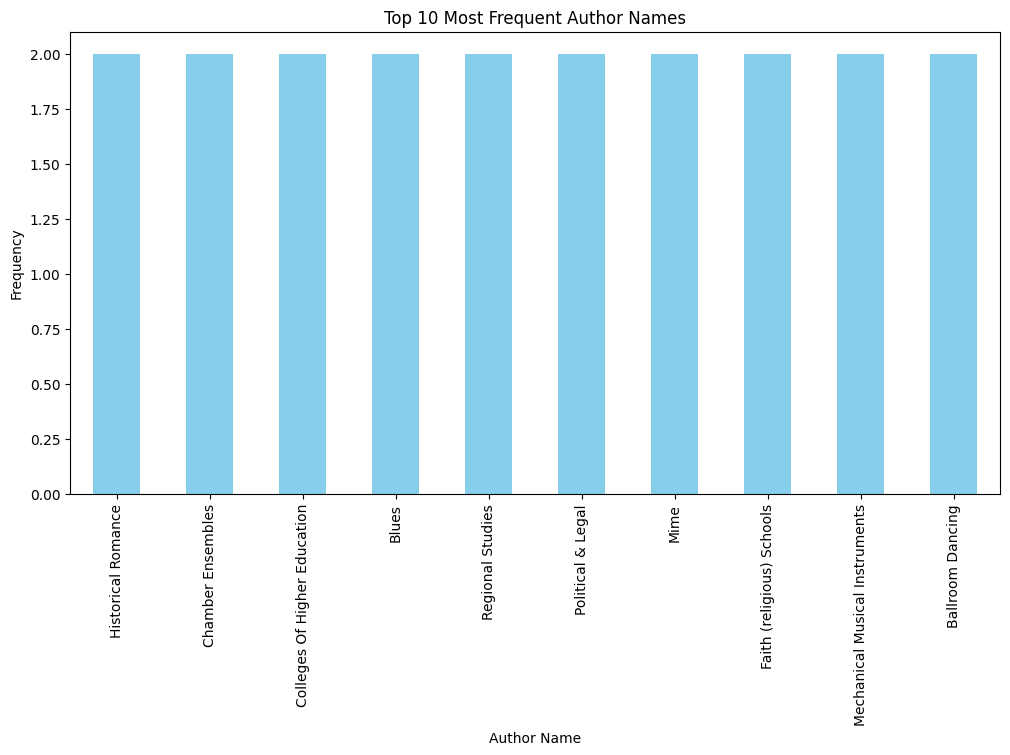

In [12]:
# Assuming your DataFrame is named 'df' #category visualization
top_10_author_names = df3['category_name'].value_counts().head(10)

# Create a bar plot for the top 20 author names
plt.figure(figsize=(12, 6))
top_10_author_names.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Author Names')
plt.xlabel('Author Name')
plt.ylabel('Frequency')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score, f1_score

In [33]:
df1['bestsellers-rank'].min()

1001.0

In [34]:

df1['bestsellers-rank'].max()

3679776.0

In [39]:
# Define the threshold
threshold = 90000

# Create a new column 'bestseller_status' based on the threshold
df1['bestseller_status'] = df1['bestsellers-rank'].apply(lambda rank: 'Bestseller' if rank <= threshold else 'Non-Bestseller')

# Display the updated DataFrame
print(df1)


                 authors  bestsellers-rank  \
0                    [1]           49848.0   
1                 [2, 3]          115215.0   
2                    [4]           11732.0   
3           [5, 6, 7, 8]          114379.0   
4                    [9]           98413.0   
...                  ...               ...   
1109378         [120629]               NaN   
1109379         [336369]               NaN   
1109380  [29792, 654019]               NaN   
1109381         [654020]               NaN   
1109382         [654021]               NaN   

                                            categories  dimension-x  \
0        [214, 220, 237, 2646, 2647, 2659, 2660, 2679]       129.00   
1                                          [235, 3386]       127.00   
2                               [358, 2630, 360, 2632]       150.00   
3                                    [377, 2978, 2980]       153.00   
4                                         [2813, 2980]       191.00   
...                  

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['lang_encoded'] = label_encoder.fit_transform(df1['lang'])

In [41]:
df1.head()

,authors,bestsellers-rank,categories,dimension-x,dimension-y,dimension-z,imprint,isbn10,isbn13,lang,publication-date,rating-avg,rating-count,title,weight,publication-year,publication-month,publication-day,bestseller_status,lang_encoded
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",129.0,198.0,20.0,Mainstream Publishing,184018907X,9781840189070,en,2004-10-14,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,224.00,2004.0,10.0,14.0,Bestseller,33
1,"[2, 3]",115215.0,"[235, 3386]",127.0,203.2,25.4,NaN,184454737X,9781844547371,en,2009-03-13,3.60,335.0,Underbelly : The Gangland War,285.76,2009.0,3.0,13.0,Non-Bestseller,33
2,[4],11732.0,"[358, 2630, 360, 2632]",150.0,224.0,28.0,NaN,8416327866,9788416327867,es,2020-04-30,3.88,37211.0,"A Sir Phillip, Con Amor",386.00,2020.0,4.0,30.0,Bestseller,35
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",153.0,234.0,24.0,NaN,571308996,9780571308996,en,2015-10-01,4.17,384.0,QI: The Third Book of General Ignorance,436.00,2015.0,10.0,1.0,Non-Bestseller,33
4,[9],98413.0,"[2813, 2980]",191.0,240.0,29.0,HarperCollins Publishers Ltd,8352518,9780008352516,en,2019-06-18,3.90,5095.0,The Hidden Power of F*cking Up,980.00,2019.0,6.0,18.0,Non-Bestseller,33


In [43]:
predicters=[ 'publication-year', 'lang_encoded','dimension-x', 'dimension-y', 'dimension-z','rating-avg', 'weight']
X=df1[predicters]
y = df1['bestseller_status']

In [44]:
from sklearn.impute import SimpleImputer
# Handle NaN values in X (input features)
X_imputer = SimpleImputer(strategy='mean')  # You can use 'mean', 'median', or other strategies
X_imputed = X_imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)
# Handle NaN values in y (target variable)
y_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaNs with the most frequent class
y_imputed = y_imputer.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y_imputed.flatten())

In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [49]:
# Create and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = logistic_regression.predict(X_val)
y_test_pred = logistic_regression.predict(X_test)

# Calculate confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation Set):")
print(conf_matrix_val)


# Calculate accuracy for validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Accuracy (Validation Set):", accuracy_val)

class_report_val = classification_report(y_val, y_val_pred)
print("Classification Report (Validation Set):")
print(class_report_val)


# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test Set):", accuracy_test)

class_report_test = classification_report(y_test, y_test_pred)
print("Classification Report (Test Set):")
print(class_report_test)


Confusion Matrix (Validation Set):
[[    0 11064]
 [    0 99875]]
Accuracy (Validation Set): 0.9002695174825806
Classification Report (Validation Set):
                precision    recall  f1-score   support

    Bestseller       0.00      0.00      0.00     11064
Non-Bestseller       0.90      1.00      0.95     99875

      accuracy                           0.90    110939
     macro avg       0.45      0.50      0.47    110939
  weighted avg       0.81      0.90      0.85    110939

Confusion Matrix (Test Set):
[[    0 11372]
 [    0 99566]]
Accuracy (Test Set): 0.8974922929924822
Classification Report (Test Set):
                precision    recall  f1-score   support

    Bestseller       0.00      0.00      0.00     11372
Non-Bestseller       0.90      1.00      0.95     99566

      accuracy                           0.90    110938
     macro avg       0.45      0.50      0.47    110938
  weighted avg       0.81      0.90      0.85    110938



In [50]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets (adjust the ratios as needed)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the logistic regression model with L2 regularization
logistic_regression = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = logistic_regression.predict(X_val)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation):")
print(conf_matrix)

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Calculate classification report for validation set
validation_report = classification_report(y_val, y_val_pred)
print("Classification Report (Validation):")
print(validation_report)

# Now, you can apply the model to the test set for final evaluation
y_test_pred = logistic_regression.predict(X_test)

# Calculate test accuracy, confusion matrix, and classification report for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Calculate confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

# Calculate classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test):")
print(test_report)

Confusion Matrix (Validation):
[[     0  22528]
 [     0 199349]]
Validation Accuracy: 0.8984662673463225
Classification Report (Validation):
                precision    recall  f1-score   support

    Bestseller       0.00      0.00      0.00     22528
Non-Bestseller       0.90      1.00      0.95    199349

      accuracy                           0.90    221877
     macro avg       0.45      0.50      0.47    221877
  weighted avg       0.81      0.90      0.85    221877


Test Accuracy: 0.8980200741852468

Confusion Matrix (Test):
[[     0  22627]
 [     0 199250]]

Classification Report (Test):
                precision    recall  f1-score   support

    Bestseller       0.00      0.00      0.00     22627
Non-Bestseller       0.90      1.00      0.95    199250

      accuracy                           0.90    221877
     macro avg       0.45      0.50      0.47    221877
  weighted avg       0.81      0.90      0.85    221877



# Clean the authors missing values

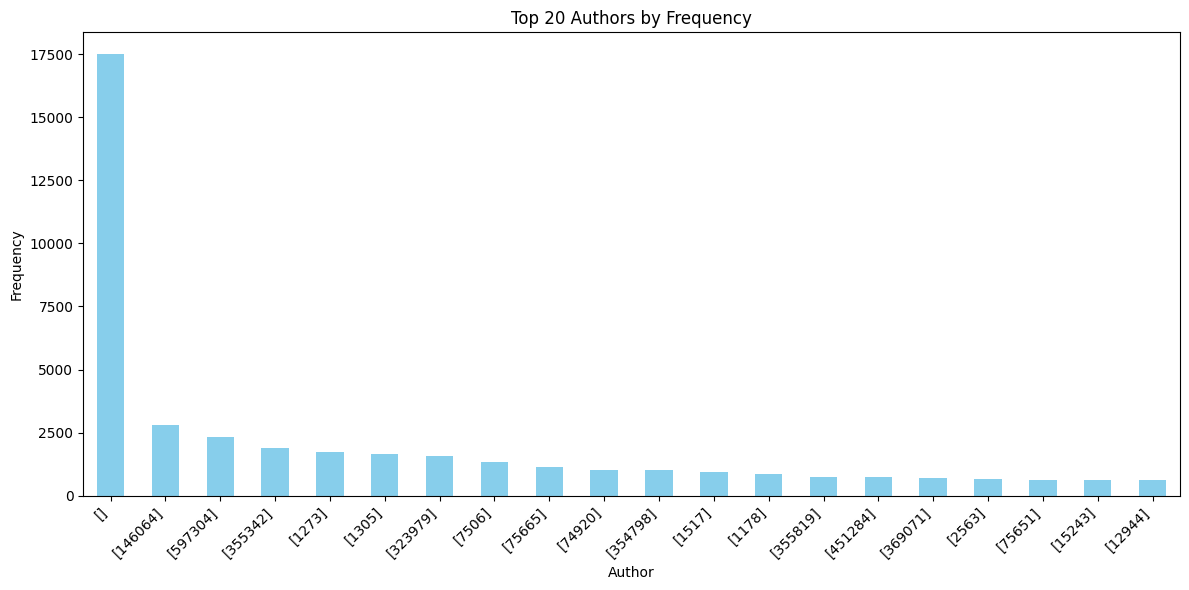

In [ ]:
# Calculate the frequency counts of authors
author_counts = df['authors'].explode().value_counts()

# Sort the authors by count in descending order
author_counts_sorted = author_counts.sort_values(ascending=False)

# Get the top 20 authors
top_20_authors = author_counts_sorted.head(20)

# Create a bar plot for the top 20 authors
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Frequency')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [ ]:
count_1273 = df['authors'].apply(lambda x: '[1273]' in x).sum()
print("Occurrences of [1273] in the authors column:", count_1273)


Occurrences of [1273] in the authors column: 1742


# Should bestseller-rank be unique or is it fine to get repeated.

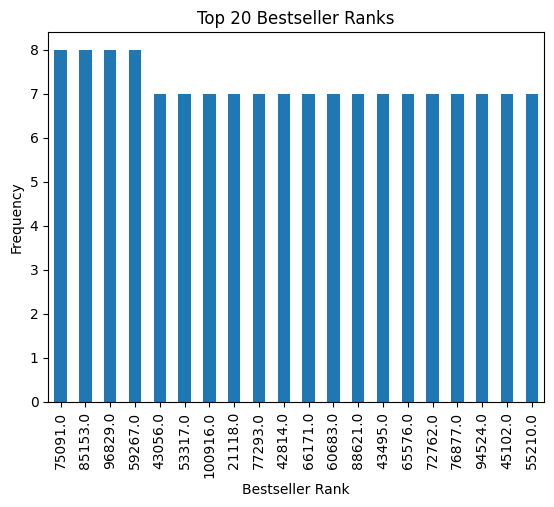

In [ ]:
top_20_bestseller_ranks = df['bestsellers-rank'].value_counts().head(20)

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks.plot(kind='bar')
plt.title('Top 20 Bestseller Ranks')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.show()


# Top 20 rank

In [ ]:
df.nsmallest(20,['bestsellers-rank'])

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
96189,[74164],1001.0,"[214, 215, 233, 238, 654, 768, 2782]",Brian Pennie shouldn't be alive today. His dru...,152.00,234.00,22.00,NaN,NaN,NaN,...,717186350,9780717186358,en,2020-03-20 00:00:00,NaN,4.59,85.0,Bonus Time : A true story of surviving the wor...,/Bonus-Time-Brian-Pennie/9780717186358,384.00
695733,[73321],1001.0,"[3223, 3225, 2819]","Anam Cara is a rare synthesis of philosophy, p...",121.67,217.17,15.24,NaN,NaN,NaN,...,006092943X,9780060929435,en,1998-12-31 00:00:00,NaN,4.22,7569.0,Anam Cara : A Book of Celtic Wisdom,/Anam-Cara-John-ODonohue/9780060929435,190.51
629379,"[391981, 7506]",1002.0,"[2525, 2529]",Visit Bob and Ginger the guinea pigs in their ...,204.00,262.00,10.00,NaN,NaN,NaN,...,241453100,9780241453100,en,2021-02-04 00:00:00,NaN,NaN,NaN,Guinea Pigs Go Gardening,/Guinea-Pigs-Go-Gardening-DK/9780241453100,356.00
95978,[74055],1005.0,"[285, 3121, 2813]",A celebration of hope. An encounter with grace...,133.00,190.00,20.00,NaN,NaN,NaN,...,310454077,9780310454076,en,2020-02-20 00:00:00,NaN,4.30,1625.0,All Along You Were Blooming : Thoughts for Bou...,/All-Along-You-Were-Blooming-Morgan-Harper-Nic...,385.00
489480,"[888, 322742, 210991]",1006.0,"[215, 334, 2778]",The No. 1 Sunday Times and internationally bes...,131.00,197.00,15.00,NaN,NaN,NaN,...,1444776770,9781444776775,en,2014-06-19 00:00:00,NaN,3.81,45384.0,The Reason I Jump: one boy's voice from the si...,/Reason-I-Jump-one-boys-voice-from-silence-aut...,172.00
753116,"[61001, 228590]",1007.0,"[29, 218]",'Must surely be the definitive life of Francis...,159.00,240.00,60.00,NaN,NaN,NaN,...,7298412,9780007298419,en,2021-01-21 00:00:00,NaN,4.00,1.0,Francis Bacon : Revelations,/Francis-Bacon-Mark-Stevens/9780007298419,1340.00
417696,[22150],1008.0,"[334, 352, 2626]","Winner of the Hugo, Nebula, and Philip K. Dick...",108.00,175.00,20.32,NaN,Reissue,NaN,...,441569595,9780441569595,en,2003-01-01 00:00:00,NaN,3.90,268740.0,Neuromancer,/Neuromancer-William-Gibson/9780441569595,143.00
573906,[100827],1008.0,[2488],Follow Chaol on his sweeping journey to a dist...,129.00,198.00,46.00,NaN,NaN,NaN,...,1408887975,9781408887974,en,2018-04-19 00:00:00,NaN,4.34,145621.0,Tower of Dawn,/Tower-Dawn-Sarah-J-Maas/9781408887974,456.00
881532,[353438],1009.0,"[44, 2645]",Galway artist Roisin Cure presents snapshots o...,226.06,241.30,22.86,NaN,NaN,NaN,...,1782189084,9781782189084,en,2019-06-30 00:00:00,NaN,4.80,5.0,An Urban Sketcher's Galway,/Urban-Sketchers-Galway-Roisin-Cure/9781782189084,997.90
417513,[11574],1010.0,"[334, 343, 362, 363]",Following on from the Sunday Times number one ...,163.00,242.00,53.00,NaN,NaN,NaN,...,1509806873,9781509806874,en,2021-01-21 00:00:00,NaN,4.30,436.0,The City of Tears,/City-Tears-Kate-Mosse/9781509806874,812.00


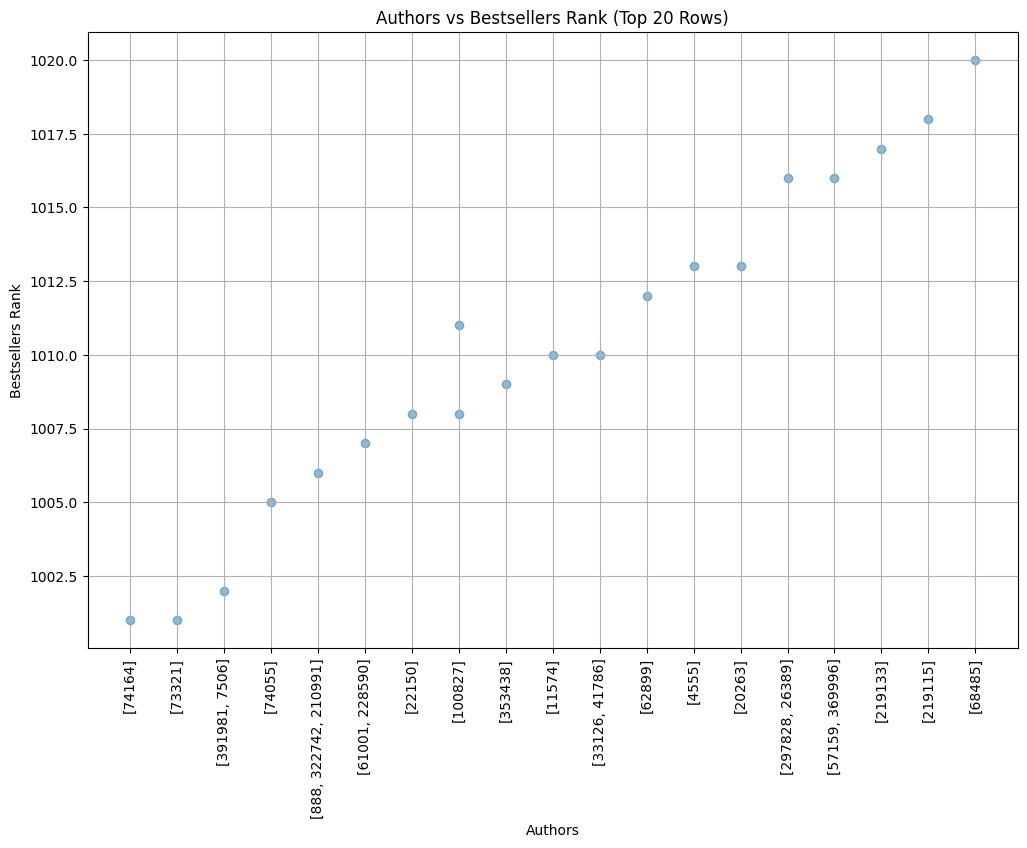

In [ ]:
import matplotlib.pyplot as plt

# Extracting the data for the top 20 rows
top_20_data = df.iloc[[96189, 695733, 629379, 95978, 489480, 753116, 417696, 573906, 881532, 417513, 539823, 648666, 235742, 417229, 417396, 648885, 649654, 353569, 306689, 95281]]

# Extracting the authors and bestsellers-rank
authors = top_20_data['authors']
bestsellers_rank = top_20_data['bestsellers-rank']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(authors, bestsellers_rank, alpha=0.5)
plt.title('Authors vs Bestsellers Rank (Top 20 Rows)')
plt.xlabel('Authors')
plt.ylabel('Bestsellers Rank')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()


PydanticImportError: ignored

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [ ]:
ProfileReport(df, title='Pandas Profiling report of "dataset"', html={'style': {'full_width': True}})


NameError: ignored

# Only 1 author

In [8]:
df1 = pd.read_csv("/content/drive/MyDrive/dataset.csv")   # dataset_csv
df2 = pd.read_csv('/content/drive/MyDrive/authors.csv')   # authors_csv
df3 = pd.read_csv('/content/drive/MyDrive/categories.csv')  # categories_csv


In [9]:


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


df1.head()



,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,1.0,9781844547371,NaN,1dc4e79575474ac775cdfe9840bdfb94,full/5/9/8/598ae8f736c99bc423352887d406d2b2f94...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,1.0,9780571308996,NaN,bc593914f06e1021be9977114ea2a28f,full/1/a/f/1af9cad94dfe897b4423993c78b137bee40...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [8]:
df2.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [8]:
df1['authors'] = df1['authors'].str.replace(r'
', '', regex=True)

df1['categories'] = df1['categories'].str.replace(r'
', '', regex=True)


SyntaxError: ignored

In [9]:


df2['author_id'] = df2['author_id'].astype(str)

df3['category_id'] = df3['category_id'].astype(str)

merged_df = df1.merge(df2, left_on='authors', right_on='author_id', how='left')

# merged_df = merged_df.merge(df3, left_on='categories', right_on='category_id', how='left')



author_1 = merged_df[merged_df['authors'].str.count(',') == 0]


author_1.head(20)



,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight,author_id,author_name
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.00,NaN,NaN,NaN,1.0,9781840189070,NaN,97c8e71f2ec114b34f243074d2091077,full/c/5/2/c529152ea1246c0cb17d6574d302eae6d2e...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mainstream Publishing,NaN,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00,NaN,NaN
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.00,New edition,NaN,NaN,1.0,9788416327867,NaN,3be3fd4fb2fceeb1eb58c3e73242ebb9,full/1/a/2/1a24ac04d4e0a01c8bb531481244b543167...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00,NaN,NaN
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.00,NaN,NaN,NaN,2.0,9780008352516,NaN,39c0422c00be90fb9258dd6df9068b1e,full/e/e/a/eea0ff6b6f1882d1862c711a2008e3c35d3...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperCollins Publishers Ltd,NaN,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00,NaN,NaN
8,[14],7004.0,"[3223, 700, 1521, 2820]",For the millions of Americans who want spiritu...,140.0,213.0,15.00,NaN,Reprint,NaN,1.0,9781451636024,NaN,8242901f9c8358e80b64f16a9b76df0b,full/f/4/e/f4e5b422024491be842709726380c7a4c1c...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1451636024,9781451636024,en,2015-06-16 00:00:00,NaN,3.92,33806.0,Waking Up : A Guide to Spirituality Without Re...,/Waking-Up-Sam-Harris/9781451636024,181.00,NaN,NaN
9,[15],66137.0,"[37, 46, 2784, 2942, 2980, 2912, 3385]","Part of the Art of Coloring series, which has ...",193.0,272.0,15.24,NaN,NaN,NaN,1.0,9781484788899,"1 Illustrations, unspecified",9f620cba34acf4ae6c717d0dd62c3aa4,full/8/0/0/800b21ffb4eddce9c7753889798e2affad0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1484788893,9781484788899,en,2017-05-04 00:00:00,NaN,4.20,5.0,Art Of Coloring: Muppets,/Art-Coloring-Muppets-Disney-Book-Group/978148...,476.27,NaN,NaN
10,[16],318003.0,"[2859, 2980, 2983]","When a young boy goes missing, a small town un...",148.0,198.0,16.00,NaN,NaN,NaN,2.0,9781409173359,NaN,870b29e7119cdf80beeb5aa626d019ce,full/3/a/4/3a444f0d8cb2b4ac55938ea31b5f76f151b...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Trapeze,NaN,1409173356,9781409173359,en,2017-10-19 00:00:00,NaN,3.12,24.0,Stranger Fillings : Edible recipes to turn you...,/Stranger-Fillings-Muffin-Brothers/9781409173359,384.00,NaN,NaN
11,[17],76405.0,"[1532, 1600, 2820]",NaN,151.0,230.0,23.00,NaN,NaN,NaN,1.0,9781401938697,NaN,448dbd5af60b3d681afc1888165dd9ca,full/8/3/9/8398ea46e10276eea120afed50d468472eb...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,1401938698,9781401938697,NaN,2015-08-26 00:00:00,NaN,4.14,12083.0,Biology of Belief: 10th Anniversary Edition,/Biology-Belief-10th-Anniversary-Edition-Bruce...,405.00,NaN,NaN
12,[18],509443.0,"[2980, 2452, 2540]",Olivia believes in making every day an adventu...,89.0,91.0,61.00,NaN,NaN,6-8,1.0,9780762451012,colour illustrations throughout,e6bf28647da12290ba99ce38cd6d3085,full/c/c/6/cc6dffe99fd691e7cc7605392ab02218185...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Running Press Miniature Editions,NaN,762451017,9780762451012,en,2013-10-01 00:00:00,NaN,NaN,NaN,Olivia Dress Me Up : A Magnetic Kit,/Olivia-Dress-Me-Up-Running-Press/9780762451012,84.00,NaN

In [10]:
author_1.shape


(771607, 30)

In [25]:
!pip install ydata-profiling

In [21]:
pip install --upgrade typing-extensions


In [26]:
from ydata_profiling import ProfileReport as pp

ImportError: ignored

In [19]:
ProfileReport(df, title='Pandas Profiling report of "dataset"', html={'style': {'full_width': True}})


NameError: ignored

In [14]:
author_1.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
author_id              object
author_name            object
dtype: object

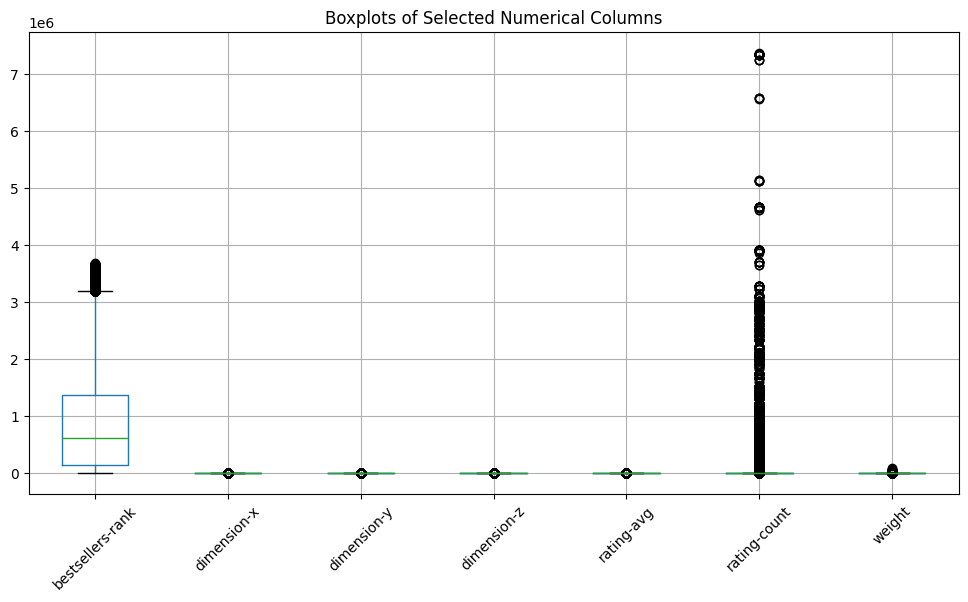

In [16]:
import matplotlib.pyplot as plt

# Select the columns you want for the boxplot
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for the selected columns
author_1[selected_columns].boxplot()
plt.title('Boxplots of Selected Numerical Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


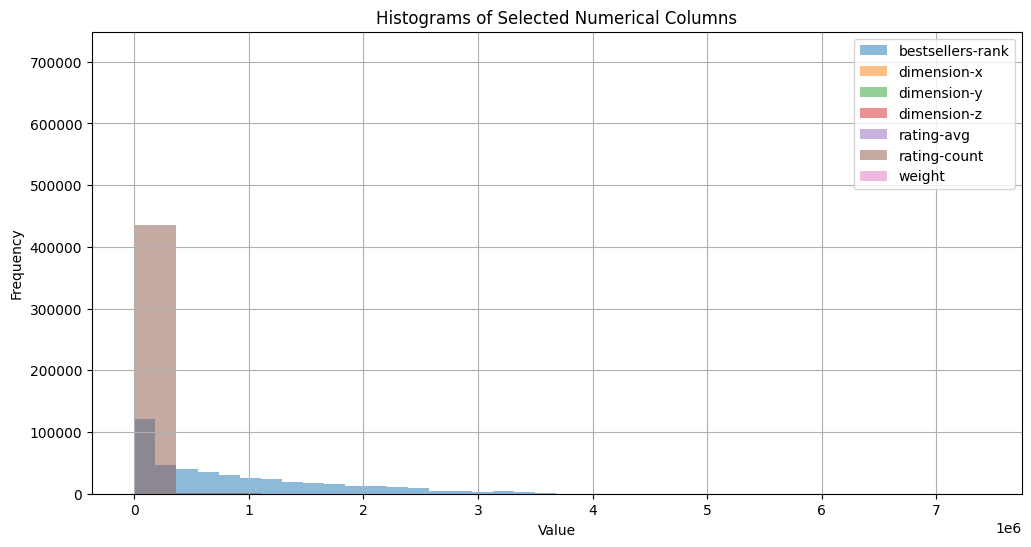

In [17]:
import matplotlib.pyplot as plt

# Select the columns you want for the histogram
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create histograms for the selected columns
for column in selected_columns:
    plt.hist(author_1[column], bins=20, alpha=0.5, label=column)

plt.title('Histograms of Selected Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


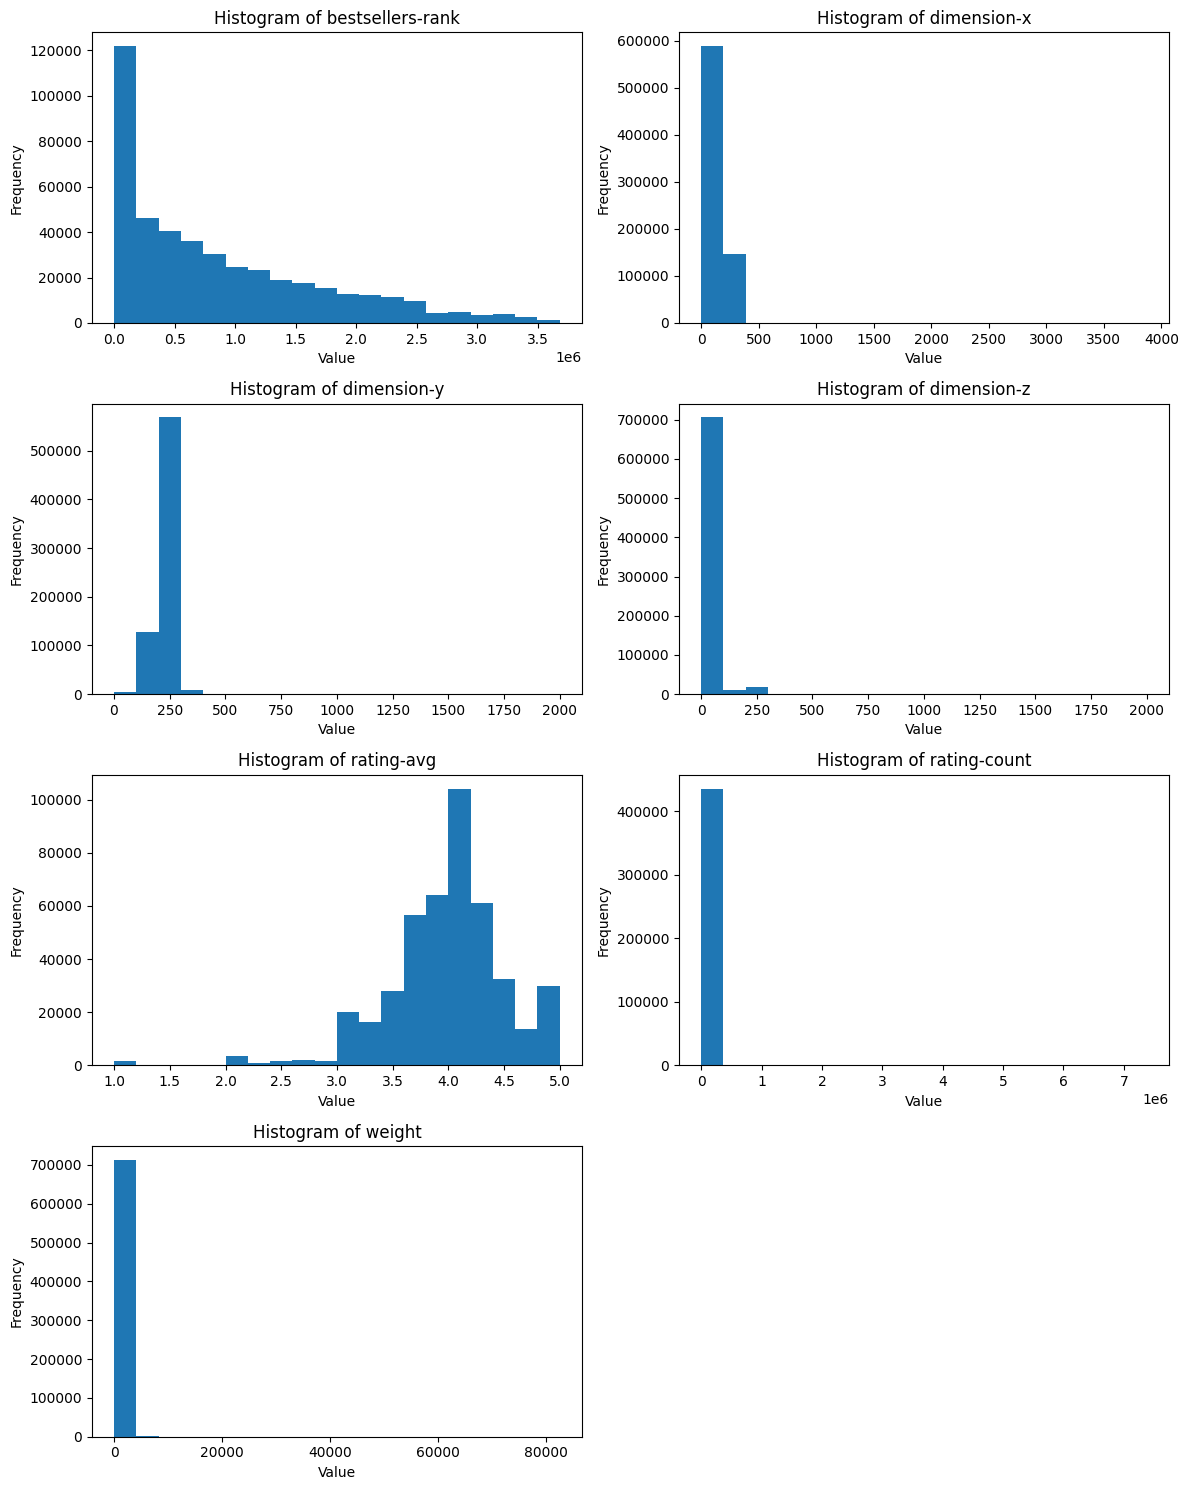

In [18]:
import matplotlib.pyplot as plt

# Select the columns you want for the histograms
selected_columns = ['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z', 'rating-avg', 'rating-count', 'weight']

# Set the figure size
plt.figure(figsize=(12, 15))

# Create histograms for each selected column separately
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot layout as needed
    plt.hist(author_1[column], bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
percent_missing = author_1.isnull().sum() * 100 / len(author_1)
missing_value_author_1 = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_author_1.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_author_1.head(28)

,missing_percentage
author_name,100.000000
publication-place,100.000000
index-date,100.000000
author_id,100.000000
for-ages,93.454699
edition,89.960952
imprint,75.594700
edition-statement,74.555311
illustrations-note,68.699740
rating-count,43.153315


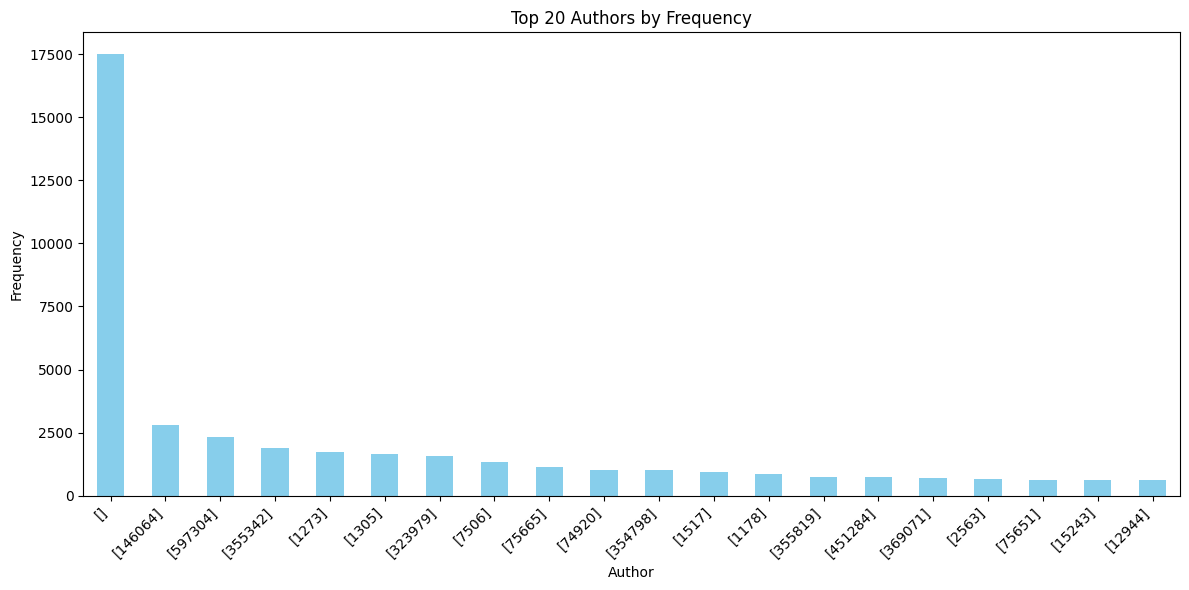

In [29]:
# Calculate the frequency counts of authors
author_counts = author_1['authors'].explode().value_counts()

# Sort the authors by count in descending order
author_counts_sorted = author_counts.sort_values(ascending=False)

# Get the top 20 authors
top_20_authors = author_counts_sorted.head(20)

# Create a bar plot for the top 20 authors
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Top 20 Authors by Frequency')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [30]:
count_1273 = author_1['authors'].apply(lambda x: '[1273]' in x).sum()
print("Occurrences of [1273] in the authors column:", count_1273)


Occurrences of [1273] in the authors column: 1742


In [42]:
unique_bestseller_rank = author_1['bestsellers-rank'].nunique()
print(unique_bestseller_rank)


381481


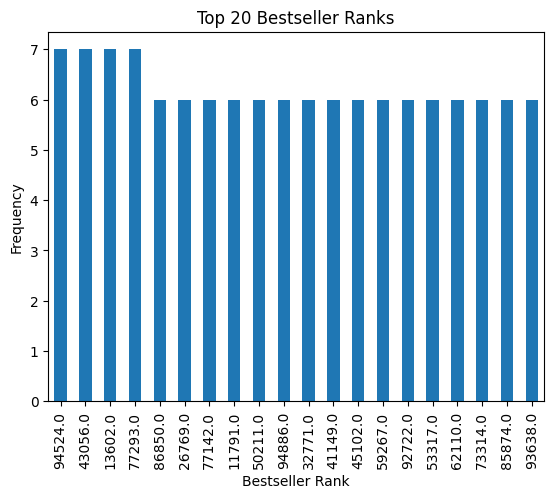

In [31]:
top_20_bestseller_ranks = author_1['bestsellers-rank'].value_counts().head(20)

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks.plot(kind='bar')
plt.title('Top 20 Bestseller Ranks')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Assuming you already have the top_20_bestseller_ranks calculated
top_20_bestseller_ranks = author_1['bestsellers-rank'].value_counts().head(20)

# Group by 'bestsellers-rank' and 'authors' and count the occurrences
rank_and_author_counts = author_1.groupby(['bestsellers-rank', 'authors']).size().reset_index(name='counts')

# Pivot the data to have 'authors' as columns and 'bestsellers-rank' as rows
pivot_data = rank_and_author_counts.pivot(index='bestsellers-rank', columns='authors', values='counts')

# Create a bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 20 Bestseller Ranks by Authors')
plt.xlabel('Bestseller Rank')
plt.ylabel('Frequency')
plt.legend(title='Authors')
plt.show()


NameError: ignored

In [32]:
author_1.nsmallest(20,['bestsellers-rank'])

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,format,id,illustrations-note,image-checksum,image-path,image-url,imprint,index-date,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight,author_id,author_name
96189,[74164],1001.0,"[214, 215, 233, 238, 654, 768, 2782]",Brian Pennie shouldn't be alive today. His dru...,152.00,234.00,22.00,NaN,NaN,NaN,1.0,9780717186358,NaN,c94f363465bfed260b5816b7ded0e9a2,full/c/6/6/c66a5448b735fc3c34972a4039131cd53b5...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Gill Books,NaN,717186350,9780717186358,en,2020-03-20 00:00:00,NaN,4.59,85.0,Bonus Time : A true story of surviving the wor...,/Bonus-Time-Brian-Pennie/9780717186358,384.00,NaN,NaN
695733,[73321],1001.0,"[3223, 3225, 2819]","Anam Cara is a rare synthesis of philosophy, p...",121.67,217.17,15.24,NaN,NaN,NaN,1.0,9780060929435,NaN,68a711b78a15f4ed0fad688e942a1ab5,full/e/4/7/e4788ed7aeb5e0e211dc00ee8e6ed52d336...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,HarperPaperbacks,NaN,006092943X,9780060929435,en,1998-12-31 00:00:00,NaN,4.22,7569.0,Anam Cara : A Book of Celtic Wisdom,/Anam-Cara-John-ODonohue/9780060929435,190.51,NaN,NaN
95978,[74055],1005.0,"[285, 3121, 2813]",A celebration of hope. An encounter with grace...,133.00,190.00,20.00,NaN,NaN,NaN,2.0,9780310454076,NaN,bb10a229937b5959ea94adc439a038ec,full/9/b/2/9b2bd37802b94ee4d52426c5abefbcec5f6...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,310454077,9780310454076,en,2020-02-20 00:00:00,NaN,4.30,1625.0,All Along You Were Blooming : Thoughts for Bou...,/All-Along-You-Were-Blooming-Morgan-Harper-Nic...,385.00,NaN,NaN
417696,[22150],1008.0,"[334, 352, 2626]","Winner of the Hugo, Nebula, and Philip K. Dick...",108.00,175.00,20.32,NaN,Reissue,NaN,1.0,9780441569595,NaN,ae8b4f8ce62dee298f9ee5318d63b445,full/2/7/e/27eddca55ebce1aa182acfa2fad5f96c336...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,NaN,NaN,441569595,9780441569595,en,2003-01-01 00:00:00,NaN,3.90,268740.0,Neuromancer,/Neuromancer-William-Gibson/9780441569595,143.00,NaN,NaN
573906,[100827],1008.0,[2488],Follow Chaol on his sweeping journey to a dist...,129.00,198.00,46.00,NaN,NaN,NaN,1.0,9781408887974,NaN,446d66fc0282b19a3aea5d367af30cba,full/3/a/1/3a1e53b74f04e9aa5c861504aa489ee6cf0...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Bloomsbury YA,NaN,1408887975,9781408887974,en,2018-04-19 00:00:00,NaN,4.34,145621.0,Tower of Dawn,/Tower-Dawn-Sarah-J-Maas/9781408887974,456.00,NaN,NaN
881532,[353438],1009.0,"[44, 2645]",Galway artist Roisin Cure presents snapshots o...,226.06,241.30,22.86,NaN,NaN,NaN,2.0,9781782189084,NaN,65b280899d3c22dbab5d5d475d555615,full/5/e/5/5e5f0c6fdbc11091cdaf2d80af662eb2170...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Currach Press,NaN,1782189084,9781782189084,en,2019-06-30 00:00:00,NaN,4.80,5.0,An Urban Sketcher's Galway,/Urban-Sketchers-Galway-Roisin-Cure/9781782189084,997.90,NaN,NaN
417513,[11574],1010.0,"[334, 343, 362, 363]",Following on from the Sunday Times number one ...,163.00,242.00,53.00,NaN,NaN,NaN,2.0,9781509806874,NaN,11520c0d614d99ceeca961cbae0cff49,full/6/1/4/6147f24127a4afc16bdb5ae2258dfc0742f...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Mantle,NaN,1509806873,9781509806874,en,2021-01-21 00:00:00,NaN,4.30,436.0,The City of Tears,/City-Tears-Kate-Mosse/9781509806874,812.00,NaN,NaN
648666,[100827],1011.0,"[2488, 2495, 2498]",Find out where the Throne of Glass journey beg...,129.00,198.00,32.00,NaN,NaN,12-17,1.0,9781408851982,NaN,7e13e162ea858ef2e8bf28ef4e129306,full/6/f/1/6f1f7655eca3e749ede08818bbdea53d122...,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,Bloomsbury YA,NaN,1408851989,9781408851982,en,2015-03-13 00:00:00,NaN,4.37,149874.0,The Assassin's Blade : The Throne of Glass Nov...,/Assassins-Blade-Sarah-J-Maas/9781408851982,322.00,NaN,NaN
235742,[62899],1012.0,"[228, 719, 780, 1300, 1456, 1602, 2840]",The No.1 New York Times Be

In [37]:
author_1.nsmallest(20, 'bestsellers-rank')[['authors', 'bestsellers-rank', 'rating-avg', 'imprint', 'title']]


,authors,bestsellers-rank,rating-avg,imprint,title
96189,[74164],1001.0,4.59,Gill Books,Bonus Time : A true story of surviving the wor...
695733,[73321],1001.0,4.22,HarperPaperbacks,Anam Cara : A Book of Celtic Wisdom
95978,[74055],1005.0,4.30,NaN,All Along You Were Blooming : Thoughts for Bou...
417696,[22150],1008.0,3.90,NaN,Neuromancer
573906,[100827],1008.0,4.34,Bloomsbury YA,Tower of Dawn
881532,[353438],1009.0,4.80,Currach Press,An Urban Sketcher's Galway
417513,[11574],1010.0,4.30,Mantle,The City of Tears
648666,[100827],1011.0,4.37,Bloomsbury YA,The Assassin's Blade : The Throne of Glass Nov...
235742,[62899],1012.0,4.19,NaN,How to Change Your Mind : The New Science of P...
417229,[4555],1013.0,4.34,NaN,The Stand


In [38]:
author_1.nlargest(20, 'rating-avg')[['authors', 'bestsellers-rank', 'rating-avg', 'imprint', 'title']]


,authors,bestsellers-rank,rating-avg,imprint,title
99,[129],NaN,5.0,NaN,Cycling down The Street
118,[160],33504.0,5.0,NaN,Using Psychology in the Classroom
206,[273],67512.0,5.0,Bloomsbury Education,100 Ideas for Secondary Teachers: Outstanding ...
235,[314],1645893.0,5.0,NaN,Vegan Cookbooks : 70 of the Best Ever Healthy ...
281,[396],NaN,5.0,NaN,The Keto Vegetarian : 101 Delicious Low-Carb P...
301,[426],NaN,5.0,NaN,Dr. Food Approved Cookbook : Simply Delicious ...
307,[435],700859.0,5.0,NaN,A Reflective Practitioner's Guide to (Mis)Adve...
358,[515],836250.0,5.0,NaN,Classroom Yoga Breaks : Brief Exercises to Cre...
367,[533],NaN,5.0,NaN,Type 2 Diabetes Crock Pot Cookbook 2020 : 200 ...
390,[563],898956.0,5.0,NaN,Words That Win : How to win the debates that m...


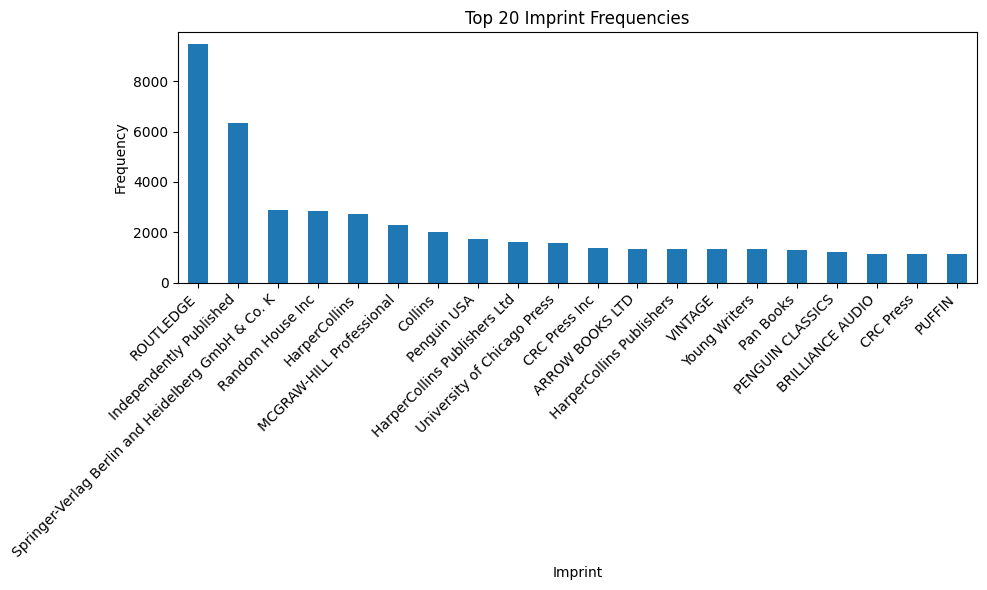

In [39]:
# Assuming your DataFrame is named df
imprint_counts = author_1['imprint'].value_counts().head(20)  # Get the top 20 imprint frequencies

# Create a bar plot
plt.figure(figsize=(10, 6))
imprint_counts.plot(kind='bar')
plt.title('Top 20 Imprint Frequencies')
plt.xlabel('Imprint')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

# authors 	bestsellers-rank 	categories 	description 	dimension-x 	dimension-y 	dimension-z 	format 	id 	imprint 	isbn10 	isbn13 	lang 	publication-date 	rating-avg 	rating-count 	title 	weight

In [19]:
# Define the list of columns you want to keep
columns_to_keep = ['authors', 'bestsellers-rank', 'categories', 'description', 'dimension-x', 'dimension-y', 'dimension-z', 'format', 'id', 'imprint', 'isbn10', 'isbn13', 'lang', 'publication-date', 'rating-avg', 'rating-count', 'title', 'weight']

# Select only the specified columns
author_1 = author_1[columns_to_keep]


In [20]:
author_1.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,format,id,imprint,isbn10,isbn13,lang,publication-date,rating-avg,rating-count,title,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.00,1.0,9781840189070,Mainstream Publishing,184018907X,9781840189070,en,2004-10-14 00:00:00,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,224.00
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.00,1.0,9788416327867,NaN,8416327866,9788416327867,es,2020-04-30 00:00:00,3.88,37211.0,"A Sir Phillip, Con Amor",386.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.00,2.0,9780008352516,HarperCollins Publishers Ltd,8352518,9780008352516,en,2019-06-18 00:00:00,3.90,5095.0,The Hidden Power of F*cking Up,980.00
8,[14],7004.0,"[3223, 700, 1521, 2820]",For the millions of Americans who want spiritu...,140.0,213.0,15.00,1.0,9781451636024,NaN,1451636024,9781451636024,en,2015-06-16 00:00:00,3.92,33806.0,Waking Up : A Guide to Spirituality Without Re...,181.00
9,[15],66137.0,"[37, 46, 2784, 2942, 2980, 2912, 3385]","Part of the Art of Coloring series, which has ...",193.0,272.0,15.24,1.0,9781484788899,NaN,1484788893,9781484788899,en,2017-05-04 00:00:00,4.20,5.0,Art Of Coloring: Muppets,476.27


In [23]:
author_1.isnull().sum()

authors                  0
bestsellers-rank    330530
categories               0
description          61452
dimension-x          35343
dimension-y          63787
dimension-z          35343
format                4932
id                       0
imprint             583294
isbn10                   0
isbn13                   0
lang                 44054
publication-date      2248
rating-avg          332974
rating-count        332974
title                    0
weight               56407
dtype: int64

In [22]:
percent_missing = author_1.isnull().sum() * 100 / len(author_1)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(16)

,missing_percentage
imprint,75.594700
rating-count,43.153315
rating-avg,43.153315
bestsellers-rank,42.836574
dimension-y,8.266773
description,7.964158
weight,7.310328
lang,5.709383
dimension-z,4.580441
dimension-x,4.580441


In [1]:
from sklearn.impute import SimpleImputer

In [ ]:
# imputeute missing values for numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# imputeute missing values for categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Check if any missing values remain
df.isnull().sum()
